In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [173]:
data =pd.read_csv('/content/train_exit.csv')
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


# EDA

In [174]:
# Display summary statistics
data.describe(include='all')

# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

gender                         19
weight                        417
ball_controlling_skills       413
jumping_skills                 24
penalties_conversion_rate      30
mental_strength                28
shot_accuracy                 572
strong_foot                  1833
behaviour_rating              703
matches_played                666
fitness_rating                695
coaching                      125
years_of_experience           144
dtype: int64

In [175]:
# Check data types
data.dtypes

player_id                     object
name                          object
age                            int64
gender                        object
country                       object
height                        object
weight                        object
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
y

In [176]:
# Display summary statistics
summary_statistics = data.describe(include='all')

# Check for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Check data types
data_types = data.dtypes

summary_statistics, missing_values, data_types

(        player_id        name           age gender  country height  weight  \
 count       13994       13994  13994.000000  13975    13994  13994   13577   
 unique      13994       13994           NaN      2      163     31      88   
 top     PLID_4964  Keva Horan           NaN      M  England    6'0  165lbs   
 freq            1           1           NaN   6992     1157   2251    1106   
 mean          NaN         NaN     21.135844    NaN      NaN    NaN     NaN   
 std           NaN         NaN      5.162719    NaN      NaN    NaN     NaN   
 min           NaN         NaN     16.000000    NaN      NaN    NaN     NaN   
 25%           NaN         NaN     17.000000    NaN      NaN    NaN     NaN   
 50%           NaN         NaN     20.000000    NaN      NaN    NaN     NaN   
 75%           NaN         NaN     24.000000    NaN      NaN    NaN     NaN   
 max           NaN         NaN     61.000000    NaN      NaN    NaN     NaN   
 
         ball_controlling_skills  body_reflexes  b

In [177]:
# Fill missing numerical values with the mean
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

# Fill missing categorical values with the mode
cat_cols = data.select_dtypes(include=['object']).columns
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

In [178]:
cat_cols

Index(['player_id', 'name', 'gender', 'country', 'height', 'weight',
       'strong_foot', 'dedication_level', 'coaching'],
      dtype='object')

In [179]:
cat_cols.isnull().sum()

0

In [180]:
num_cols

Index(['age', 'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'behaviour_rating', 'matches_played',
       'fitness_rating', 'trophies_won', 'years_of_experience',
       'no_of_disqualifications', 'selection'],
      dtype='object')

In [181]:
num_cols.isnull().sum()

0

In [182]:
import re
# Convert Height from feet and inches to centimeters.
#Convert Weight from pounds to kilograms.

def convert_height(height):
    match = re.match(r"(\d+)'(\d+)", height)
    if match:
        feet = int(match.group(1))
        inches = int(match.group(2))
        return feet * 30.48 + inches * 2.54
    return None

def convert_weight(weight):
    match = re.match(r"(\d+)lbs", weight)
    if match:
        lbs = int(match.group(1))
        return lbs * 0.453592
    return None

# Convert height and weight columns
data['height_cm'] = data['height'].apply(convert_height)
data['weight_kg'] = data['weight'].apply(convert_weight)

# Drop the original columns if necessary
data.drop(columns=['height', 'weight'], inplace=True)

# Display the updated DataFrame
print(data.head())

    player_id                 name  age gender    country  \
0   PLID_4964           Keva Horan   23      M    Ukraine   
1  PLID_11234           Herma Tann   18      M     Russia   
2  PLID_19127         Eilene Kizer   16      F      Spain   
3  PLID_17467       Andrea Badgett   27      M      Chile   
4   PLID_9661  Jeremiah Bumbalough   19      F  Argentina   

   ball_controlling_skills  body_reflexes  body_balance  jumping_skills  \
0                     77.0           58.0          47.0            59.0   
1                     54.0           69.0          70.0            62.0   
2                     34.0           43.0          45.0            69.0   
3                     79.0           73.0          76.0            86.0   
4                     47.0           61.0          74.0            57.0   

   penalties_conversion_rate  ...  matches_played  fitness_rating  \
0                       41.0  ...        3.908463        8.100000   
1                       53.0  ...        0.0

# Uni-variate and Bi-variate analysis

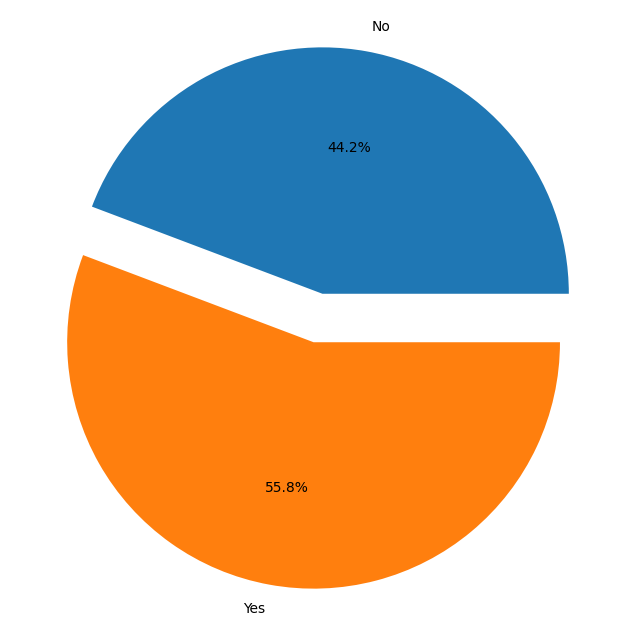

In [183]:
plt.figure(figsize=(8,8))
pie = data.groupby('selection')['selection'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%');

Most of the players are selected.

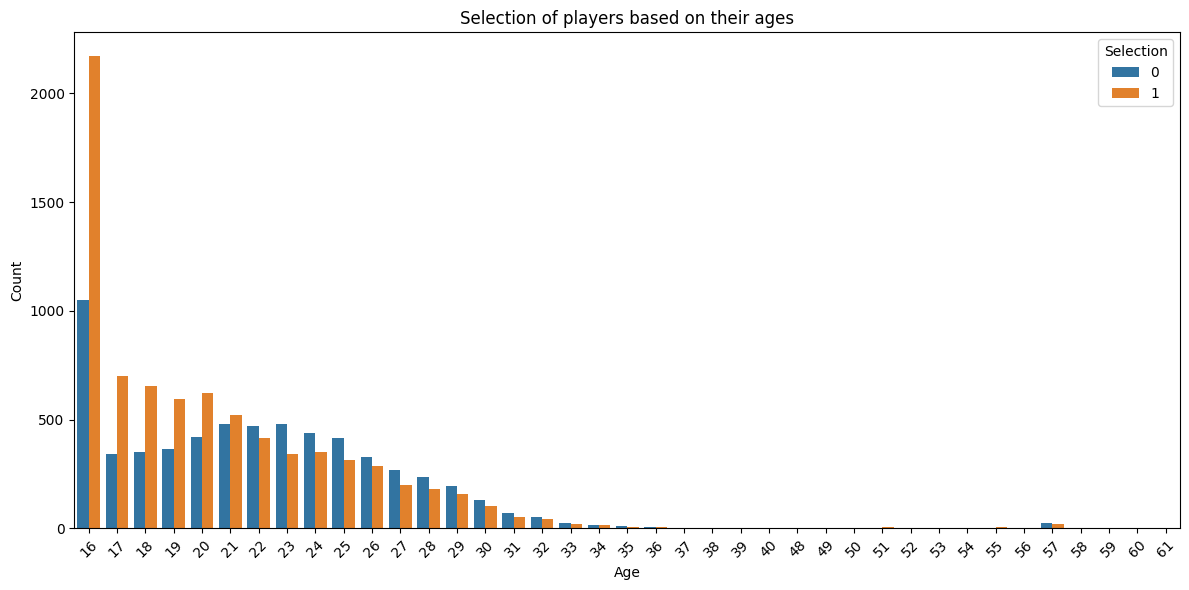

In [184]:
plt.figure(figsize=(12, 6))
sns.countplot(x='age', hue='selection', data=data)
plt.title('Selection of players based on their ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Selection', loc='upper right')
plt.tight_layout()
plt.show()

Most of the players between age 16 to 21 are selected.

In [185]:
data.isnull().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
height_cm                    0
weight_kg                    0
dtype: int64

In [186]:
data.dtypes

player_id                     object
name                          object
age                            int64
gender                        object
country                       object
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
years_of_experience          float64
no_of_disqualifications      float64
s

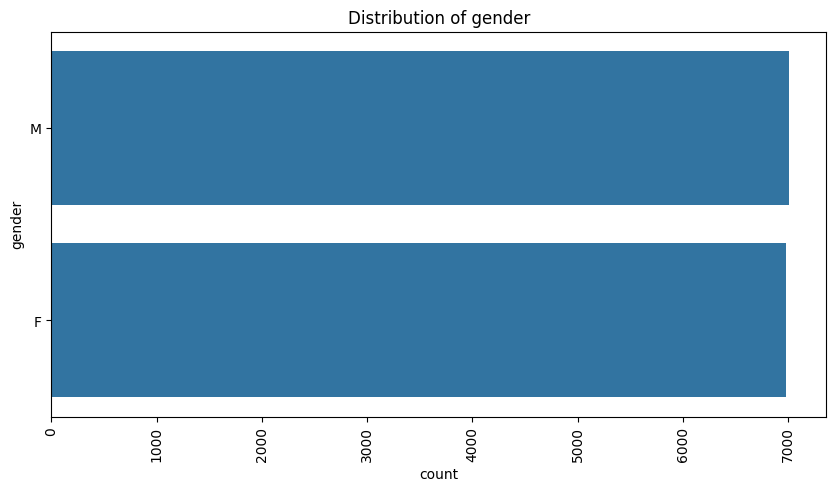

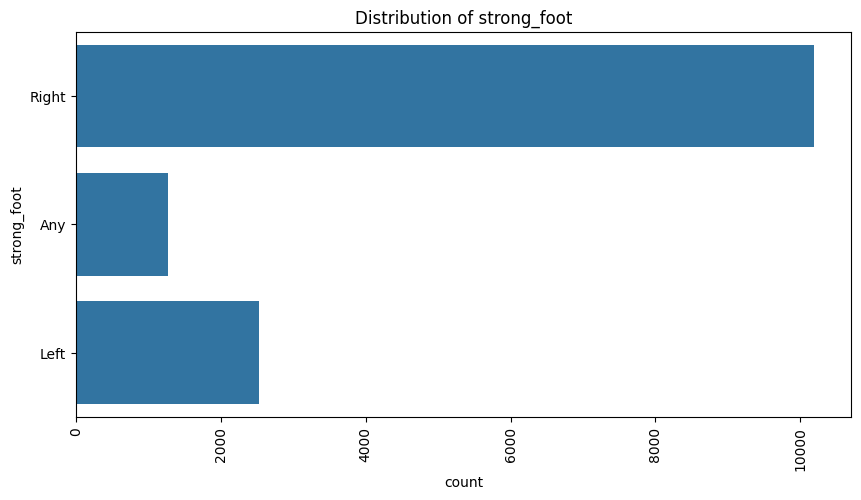

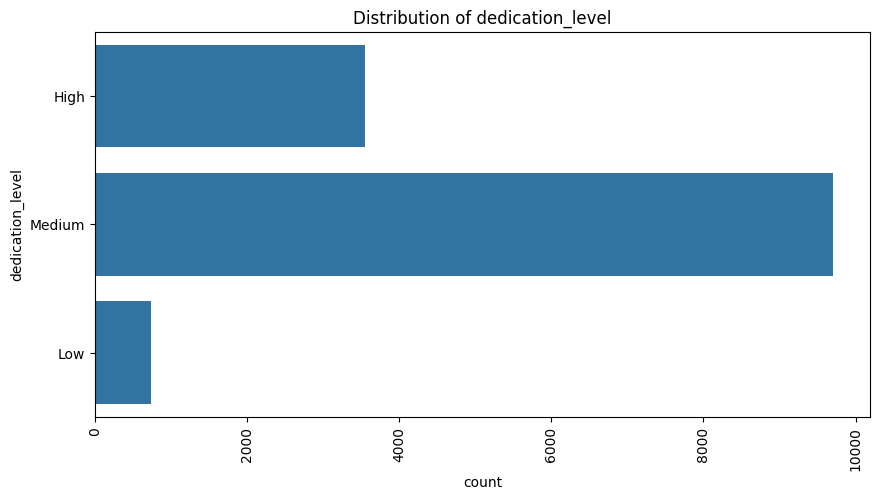

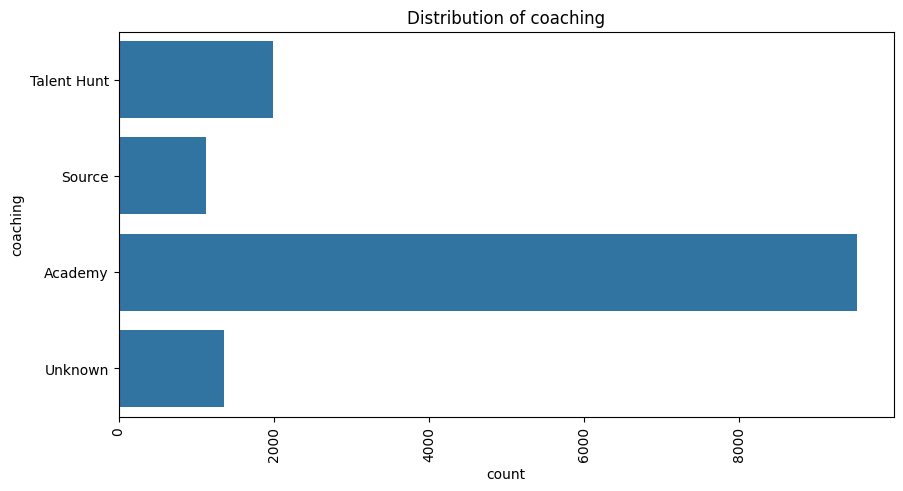

In [187]:
# List of categorical columns
# Uni-variate analysis
categorical_cols = ['gender', 'strong_foot', 'dedication_level', 'coaching']

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

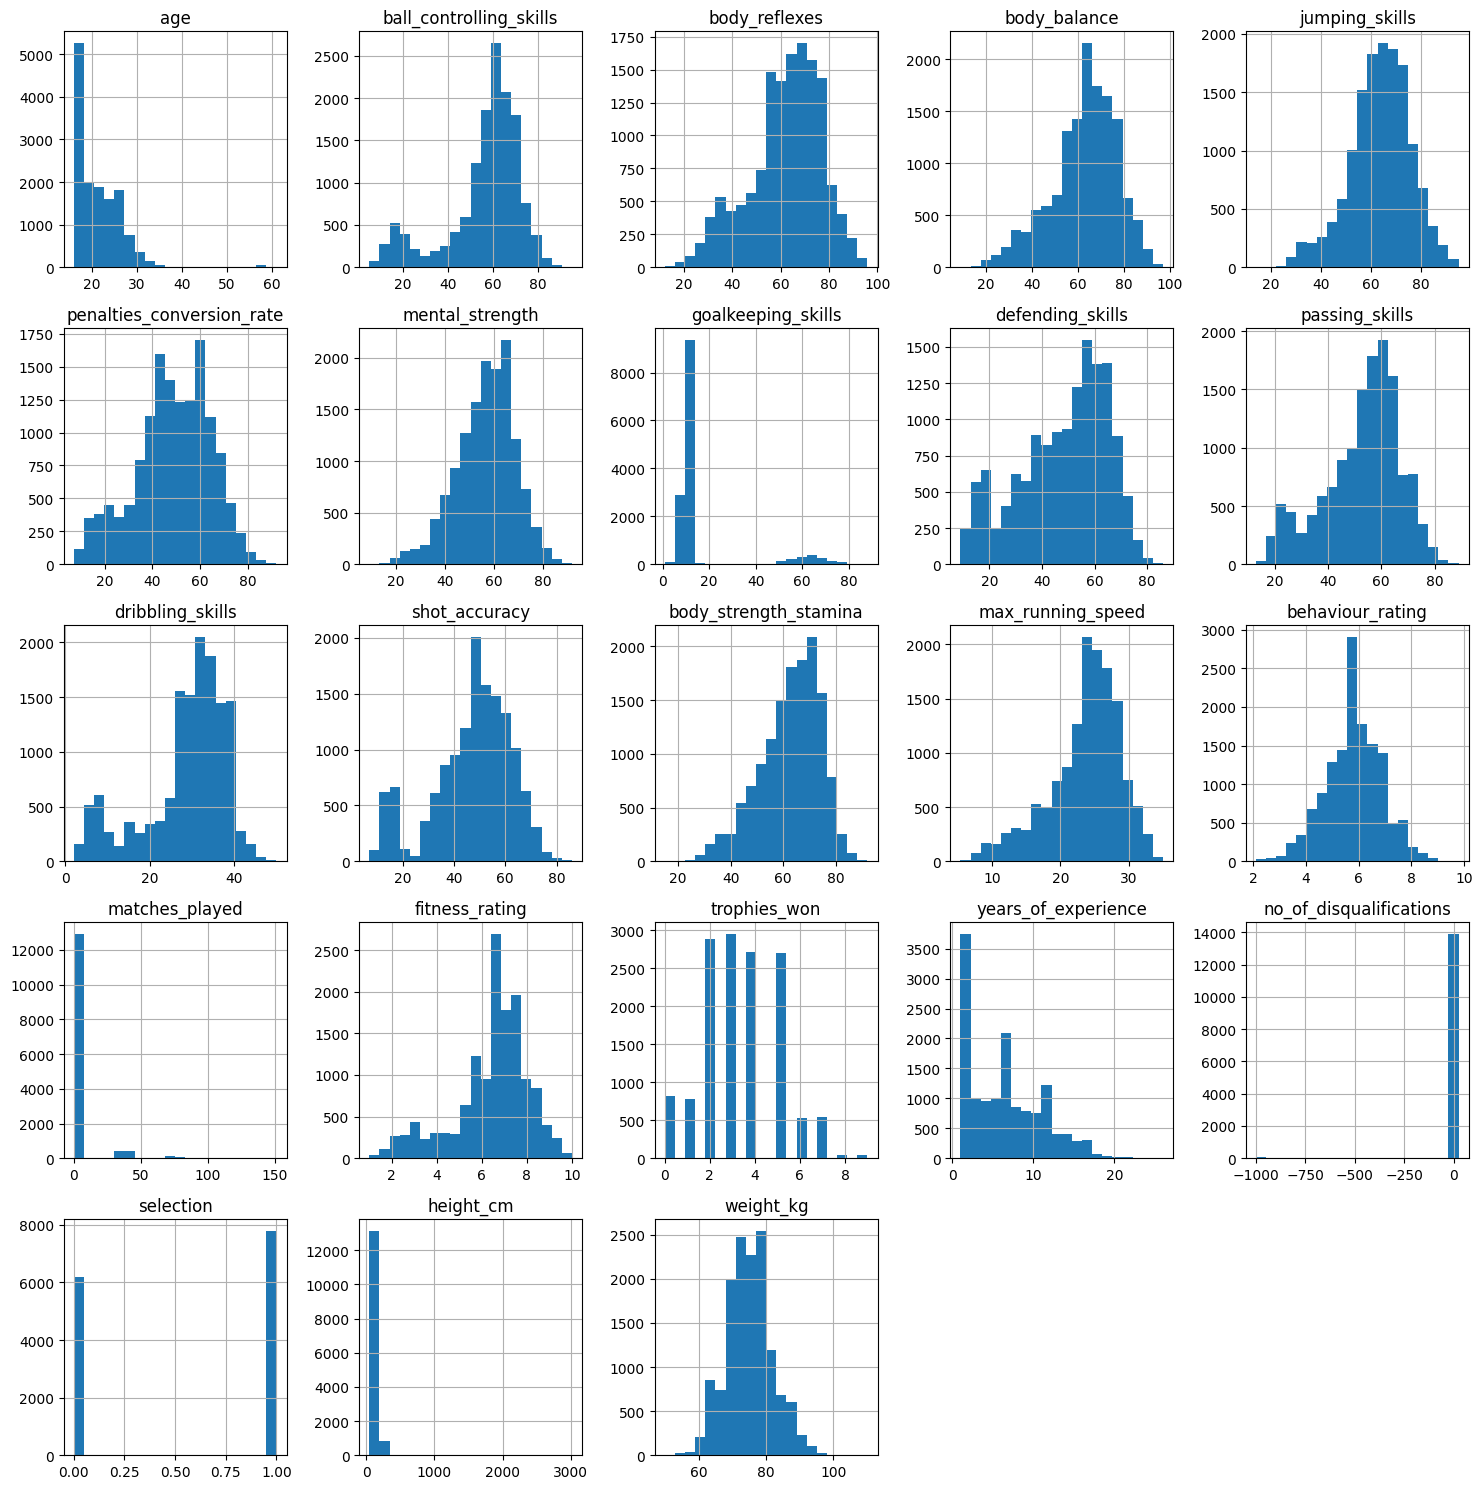

In [188]:
# List of numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical columns
data[numerical_cols].hist(figsize=(15, 15), bins=20, layout=(5, 5))
plt.tight_layout()
plt.show()

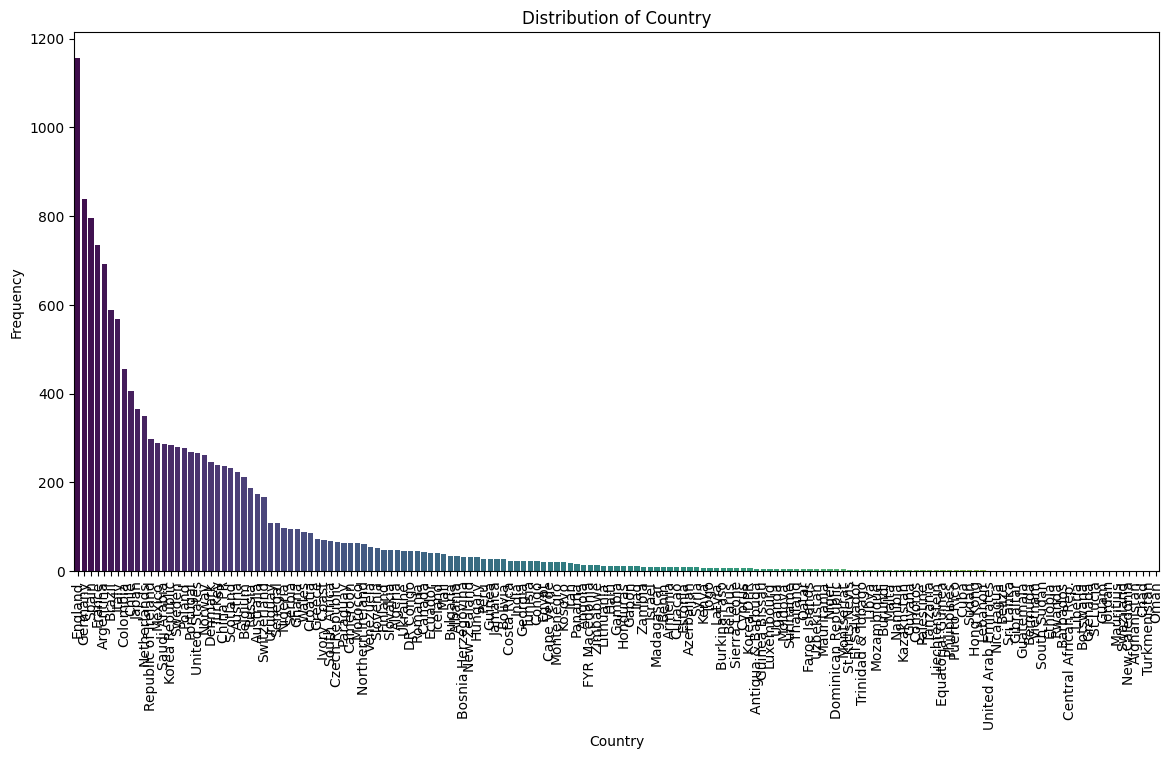

In [189]:
# uni-variate analysis

if 'country' in data.columns:
    plt.figure(figsize=(14, 7))
    country_counts = data['country'].value_counts()
    sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
    plt.title('Distribution of Country')
    plt.xlabel('Country')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Column 'country' not found in the dataset.")

Dropping un-necessary features

In [190]:
columns_to_drop = ['player_id', 'name']  # Add more columns to drop if needed
data.drop(columns=columns_to_drop, inplace=True)

Bi-variate analysis

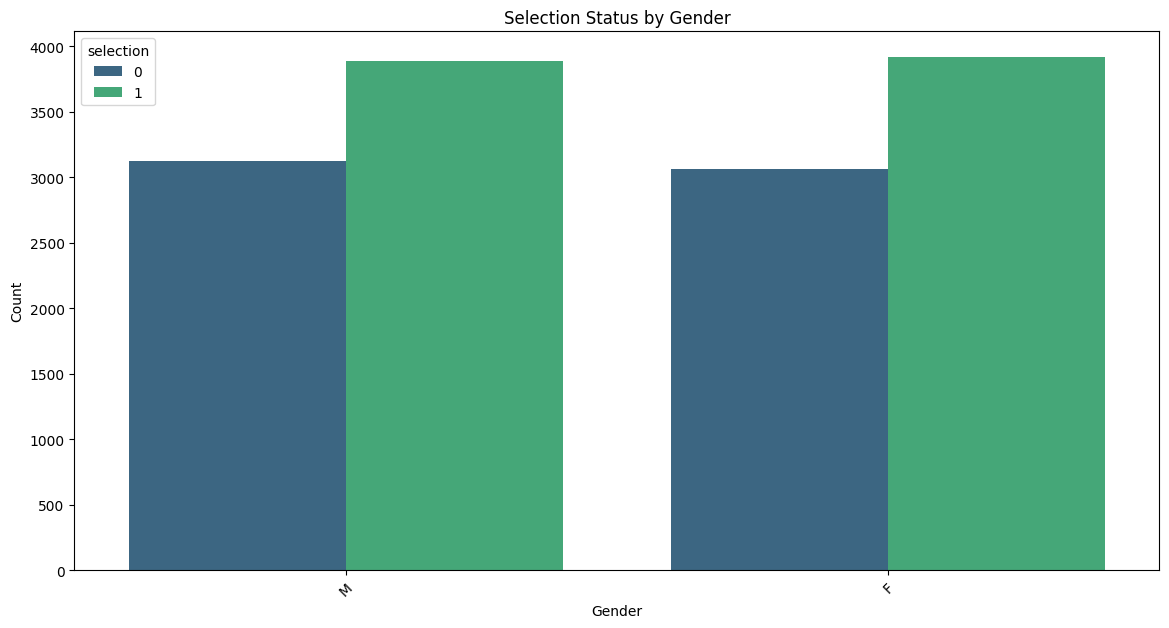

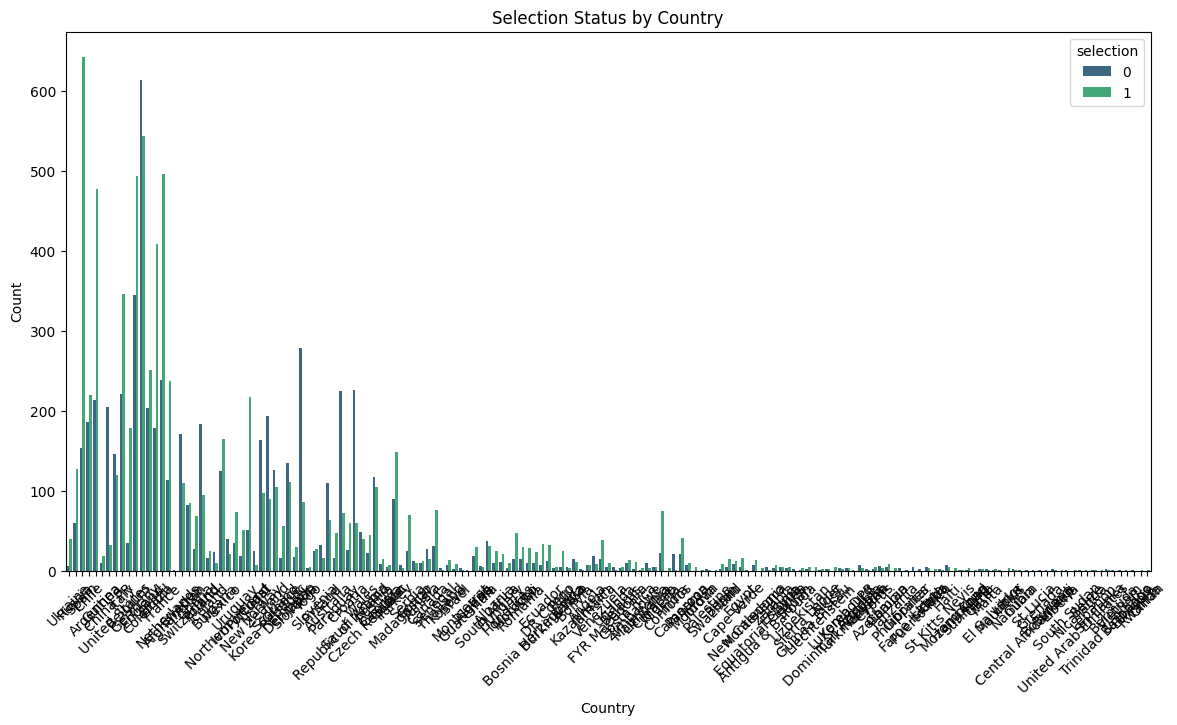

Column 'height_cmweight_kg' not found in the dataset.


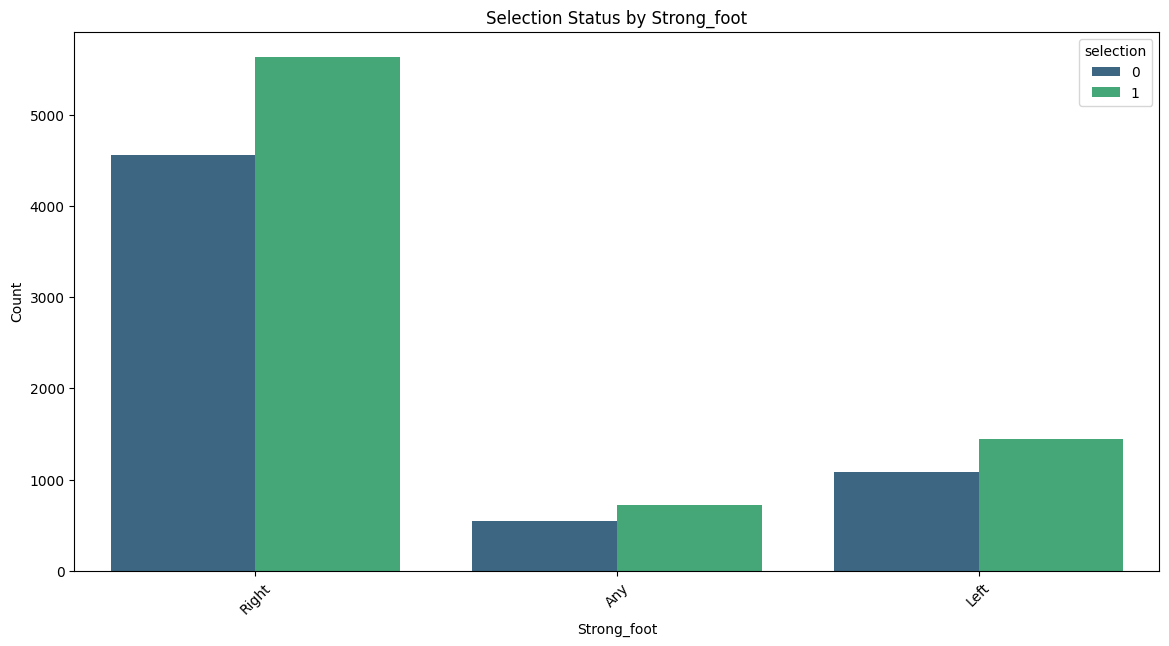

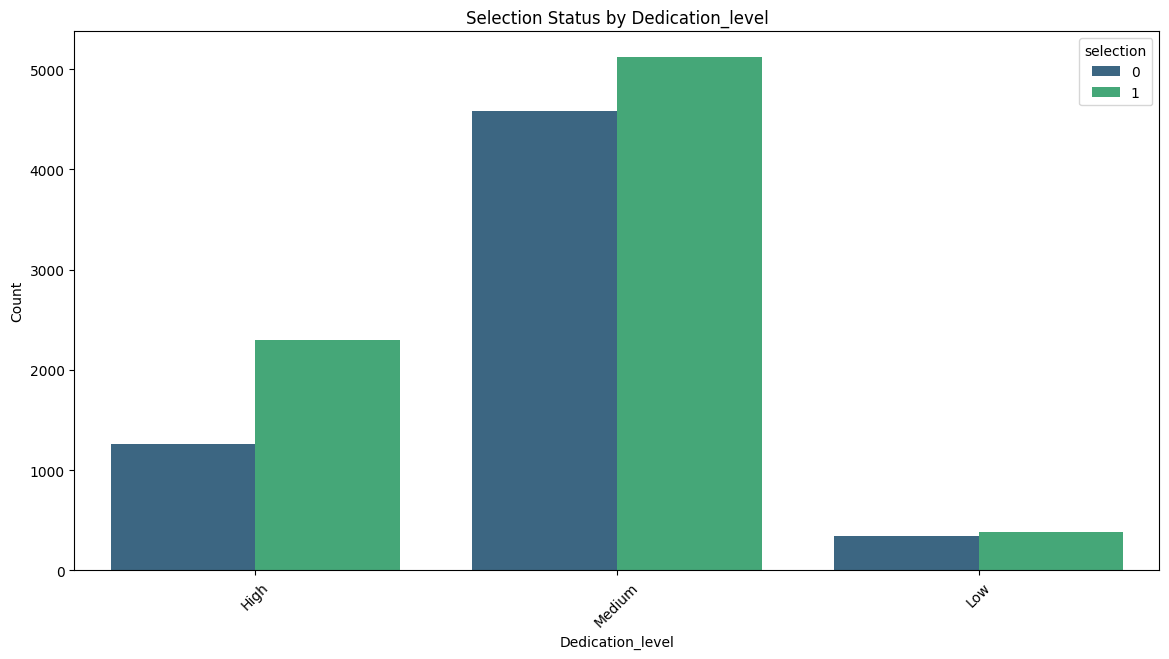

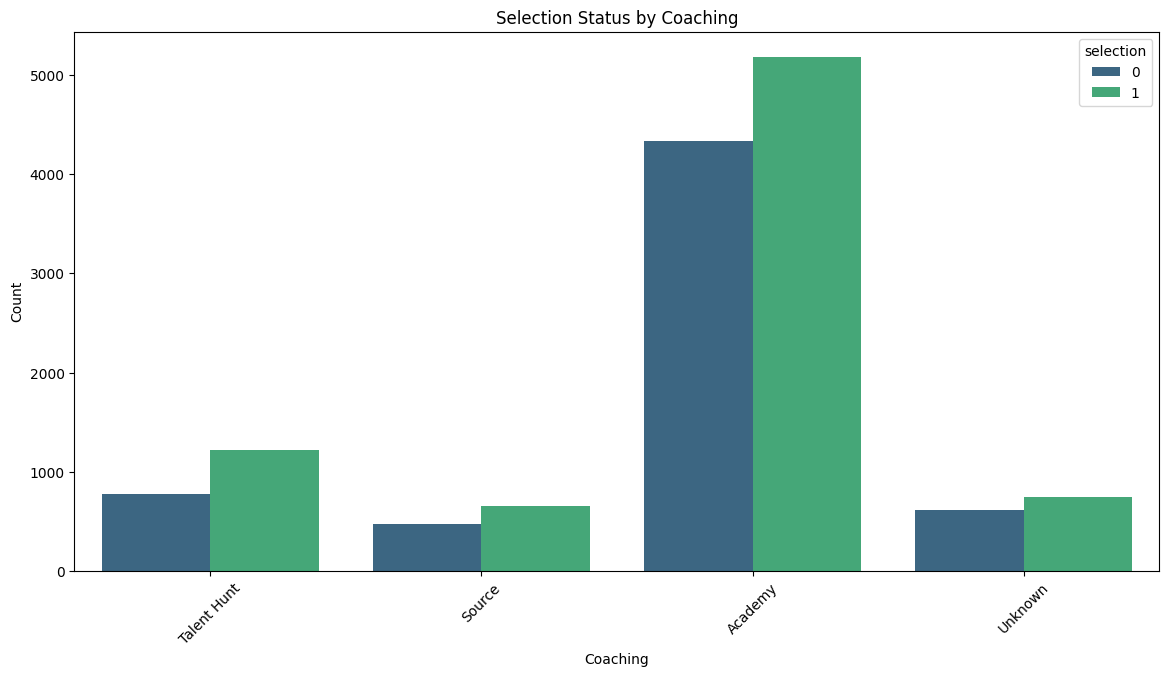

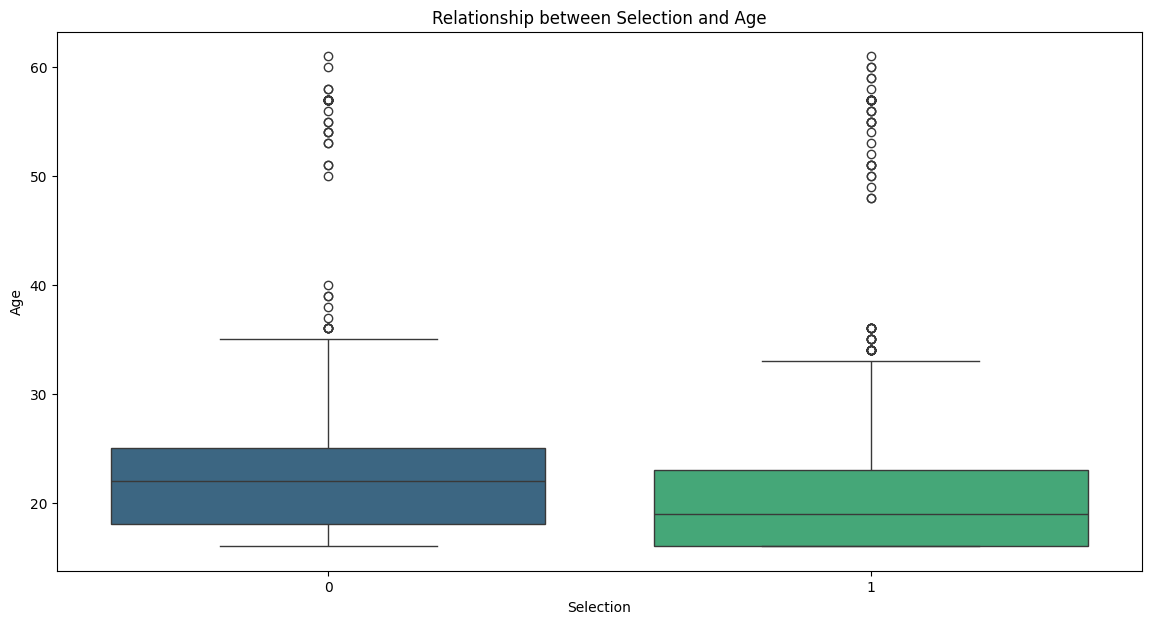

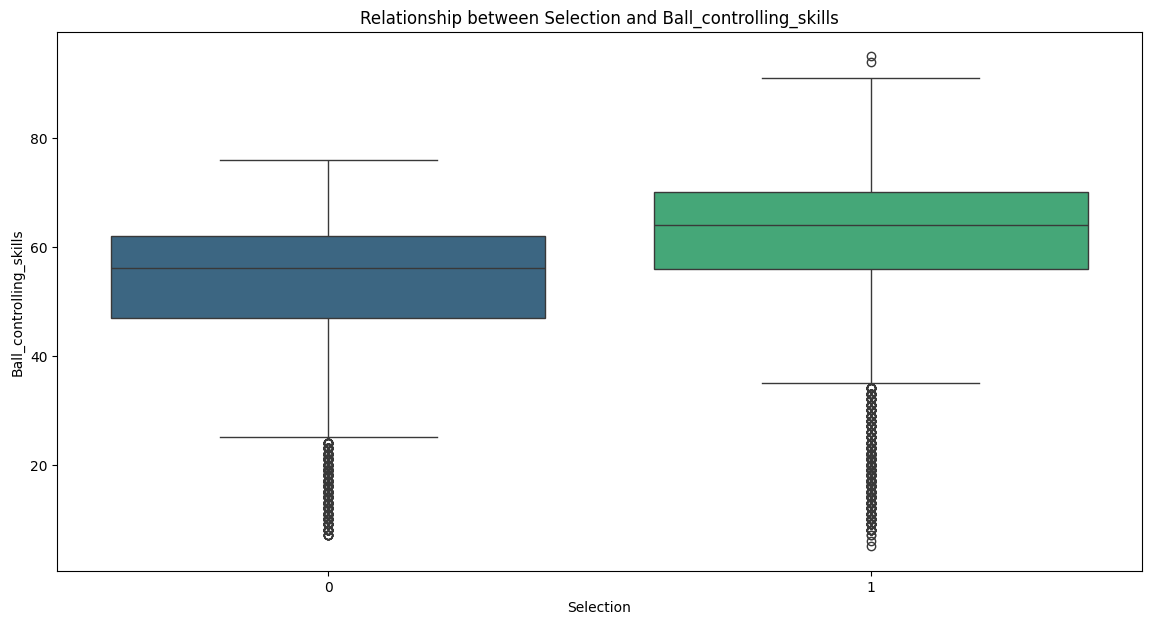

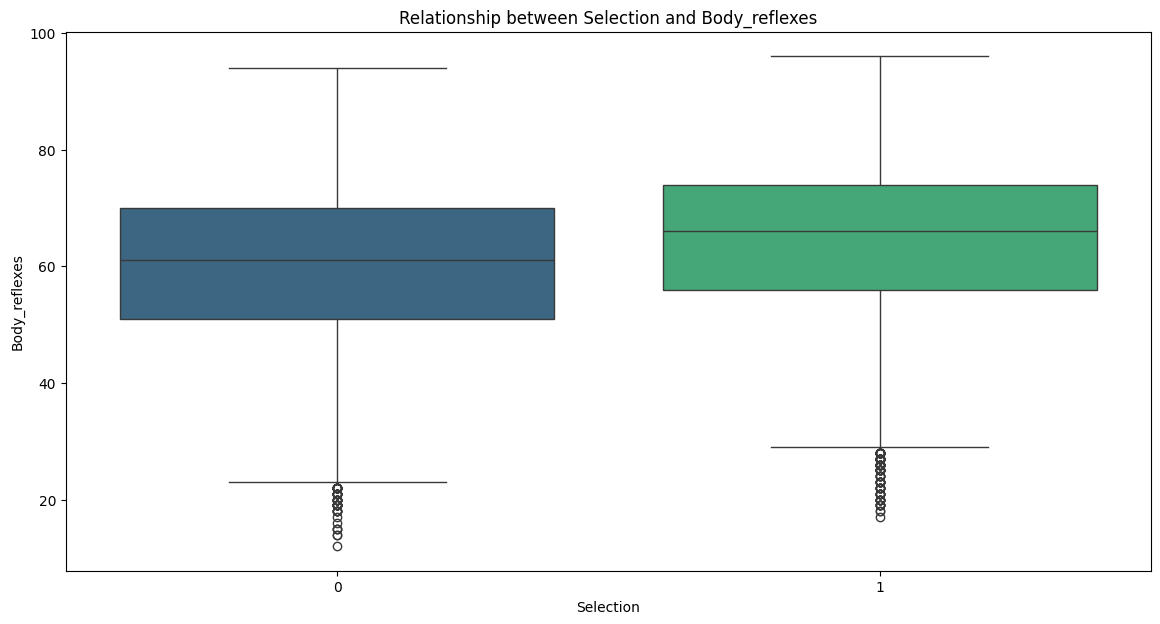

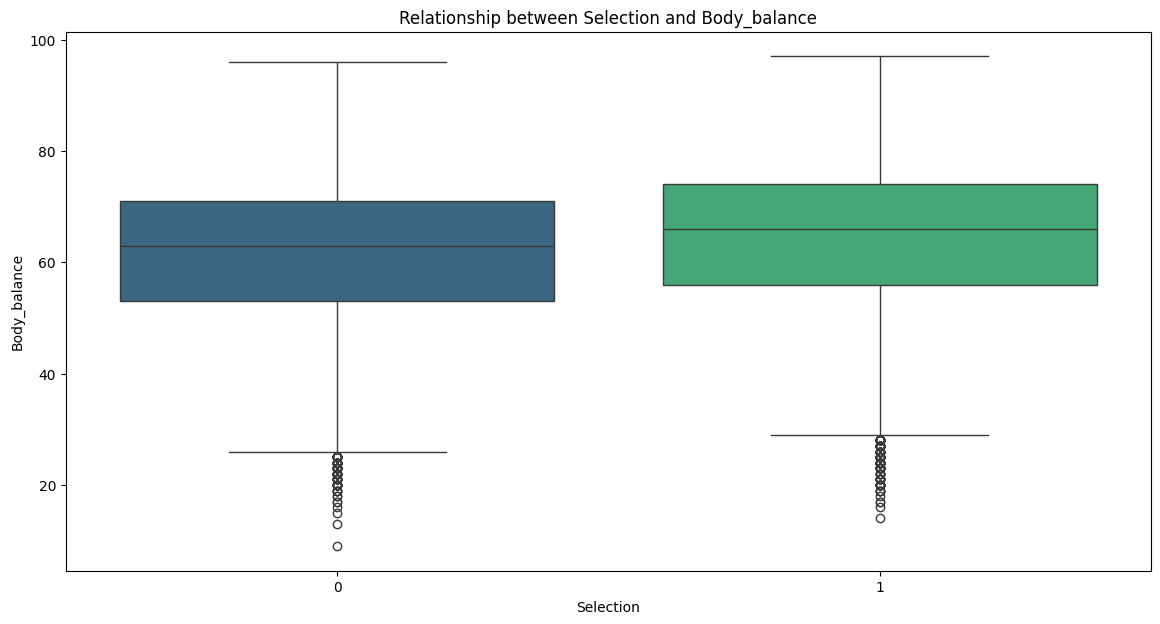

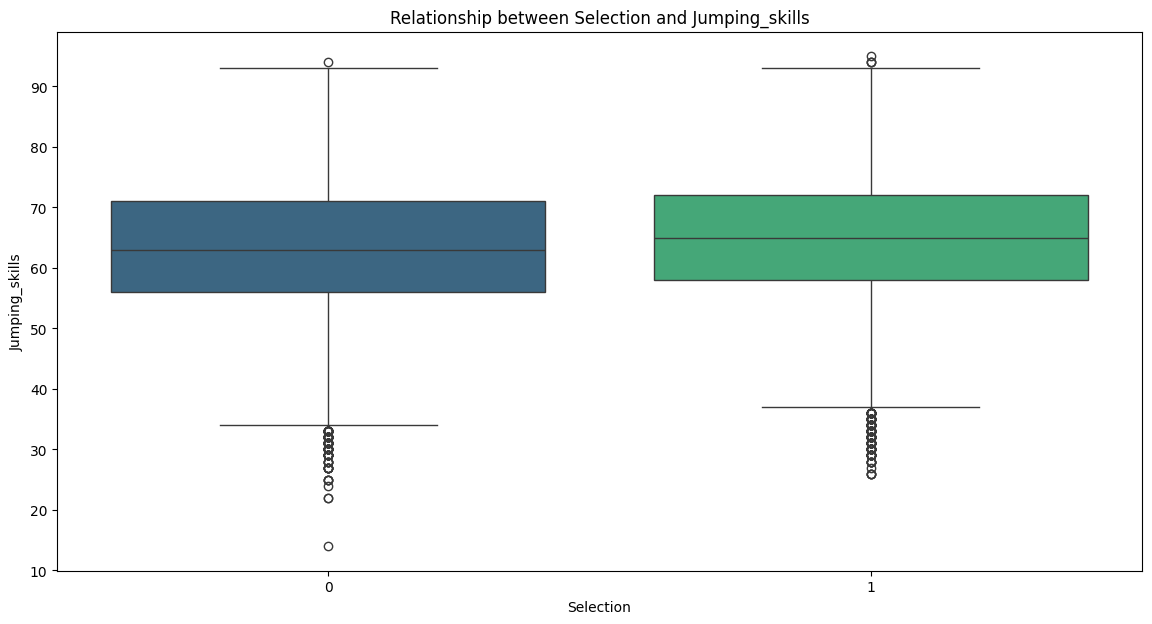

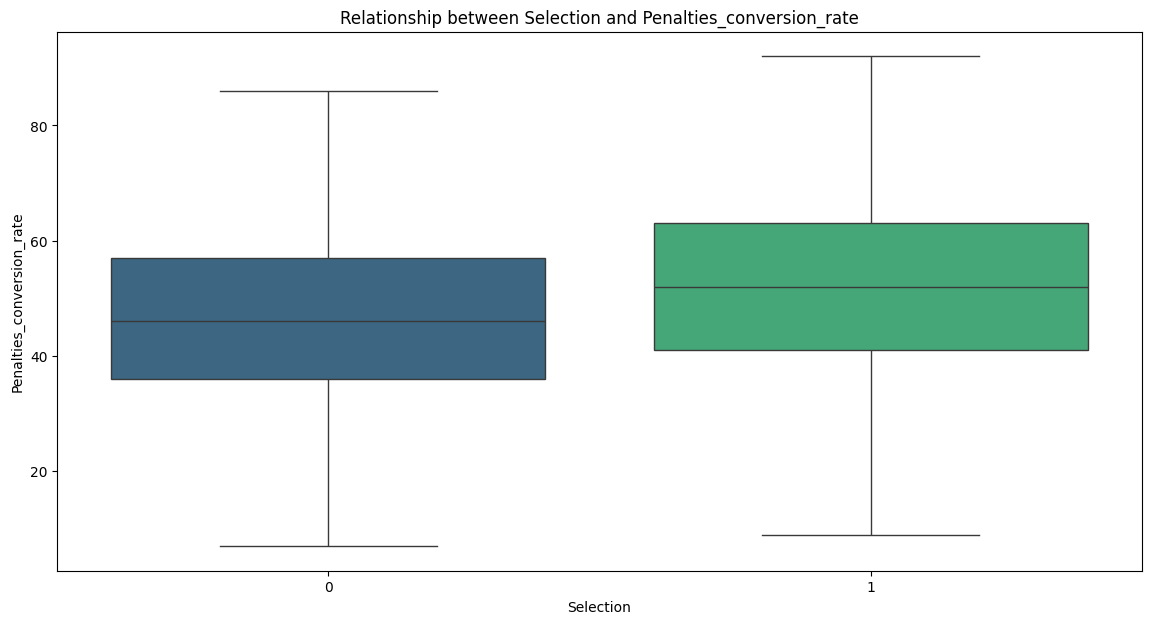

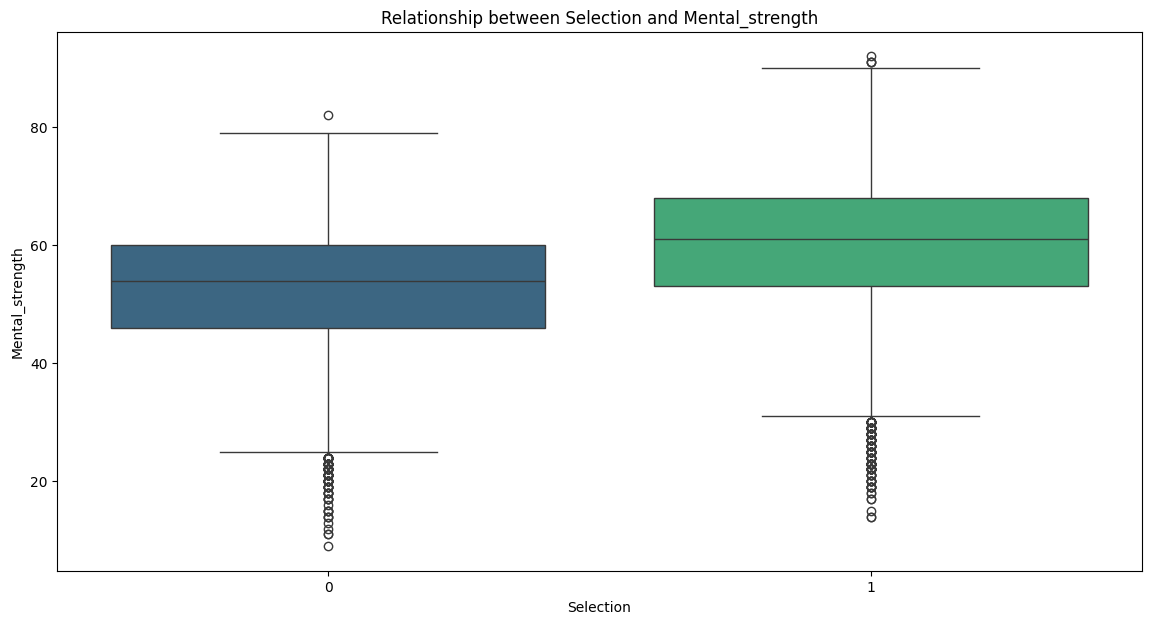

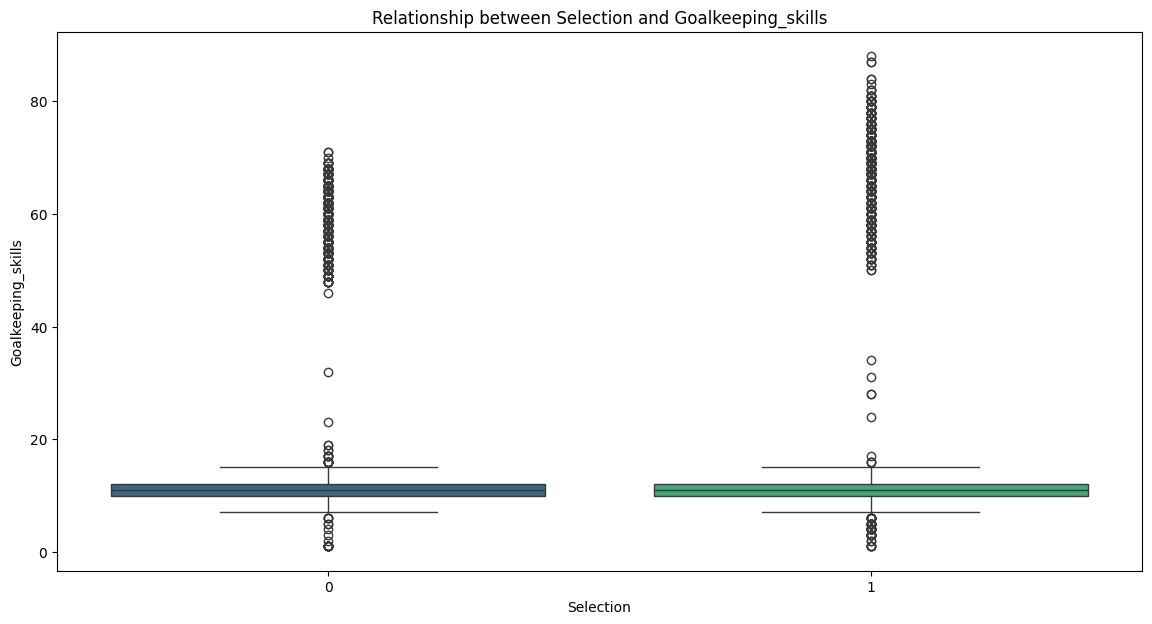

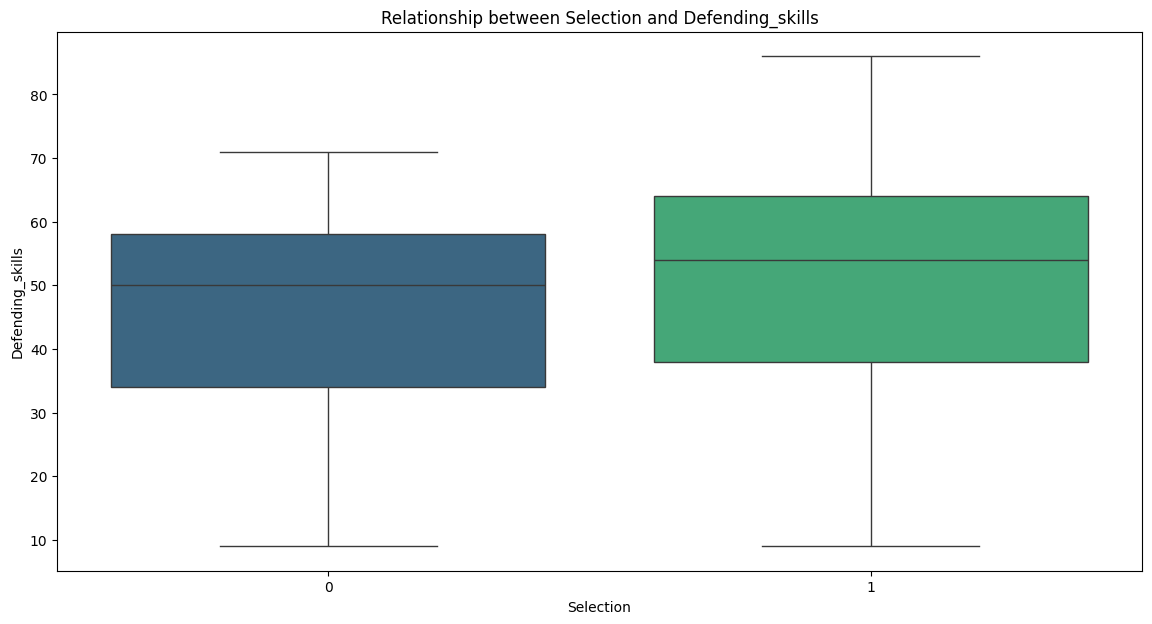

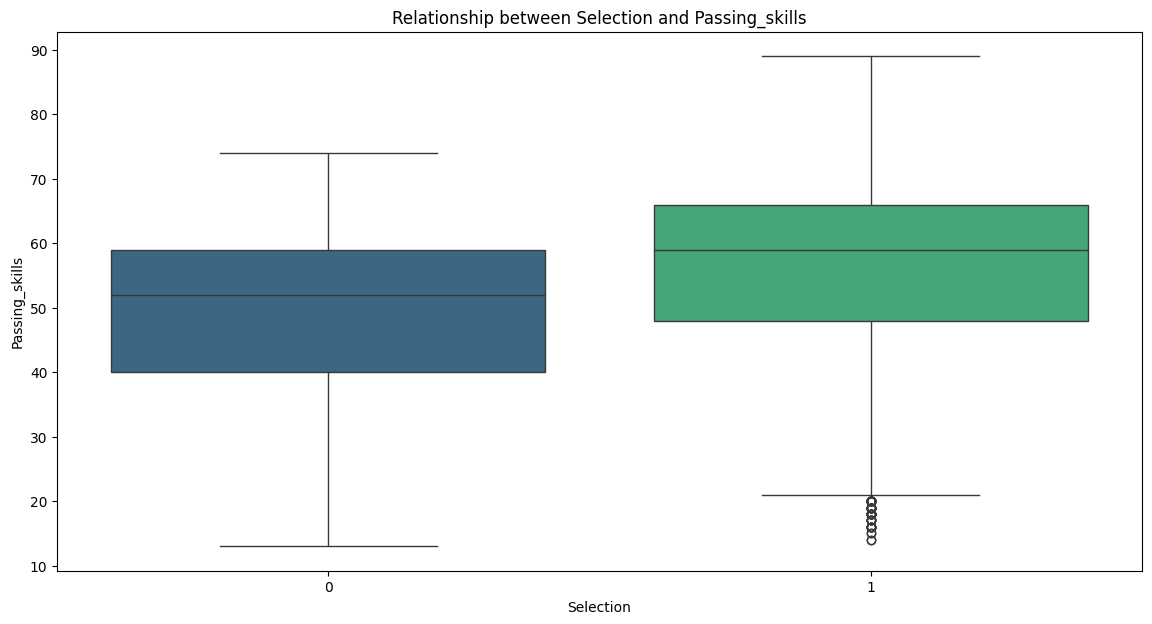

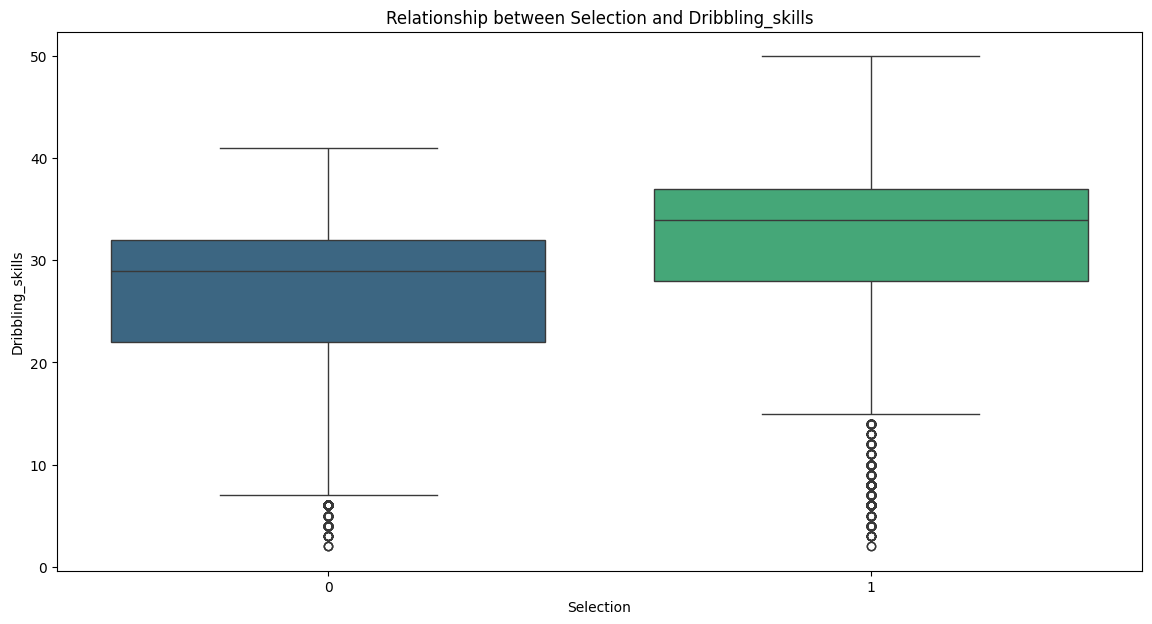

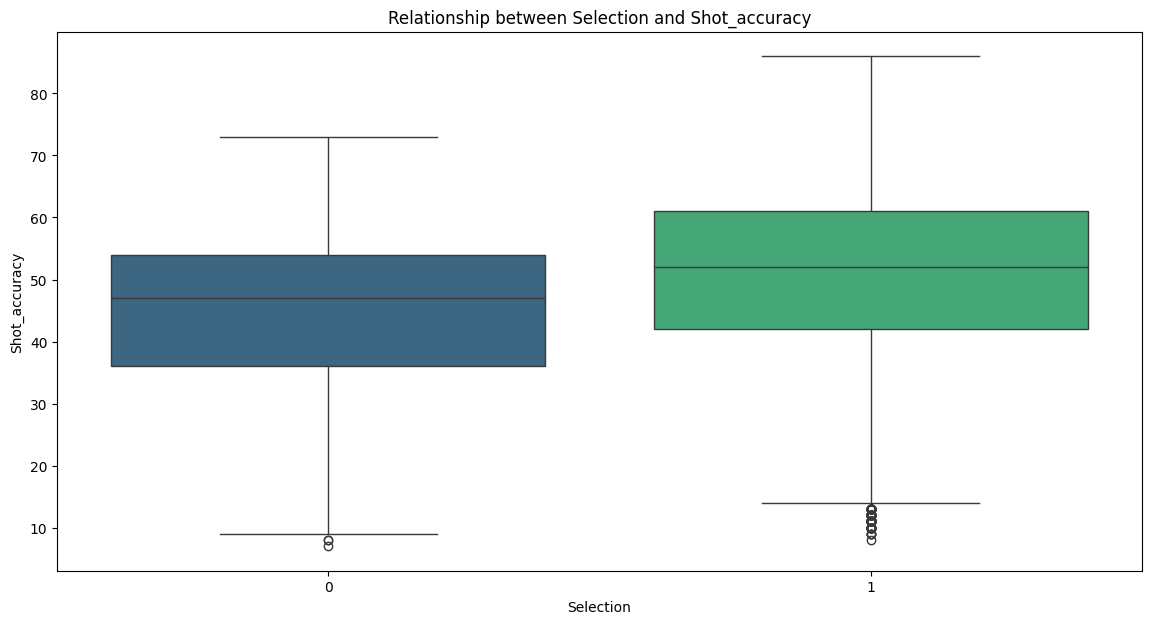

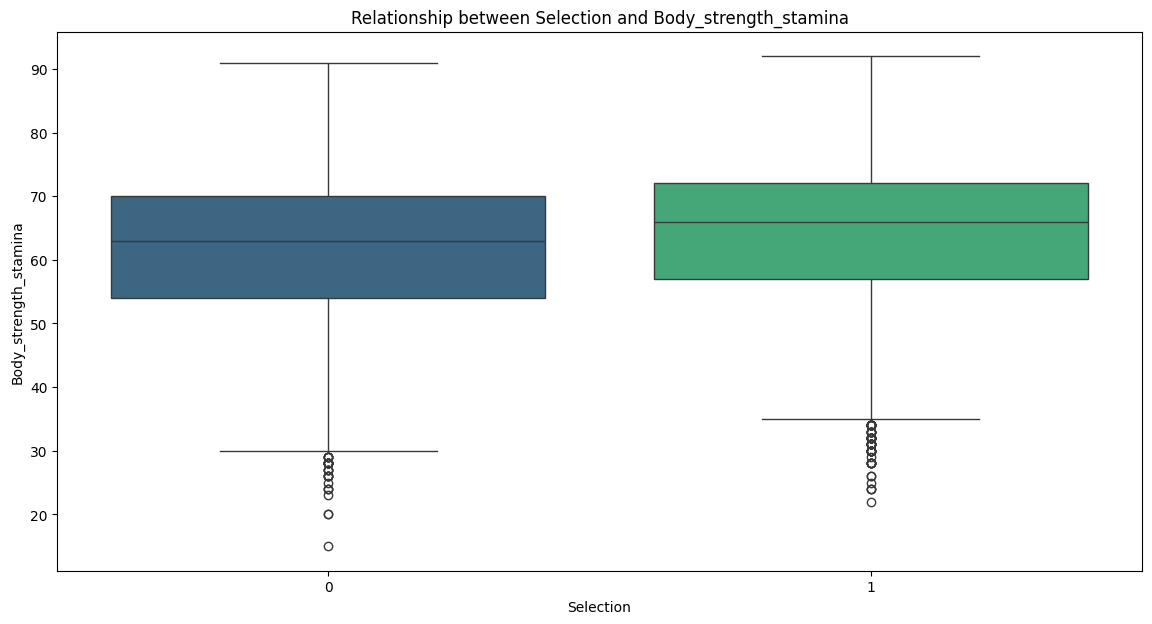

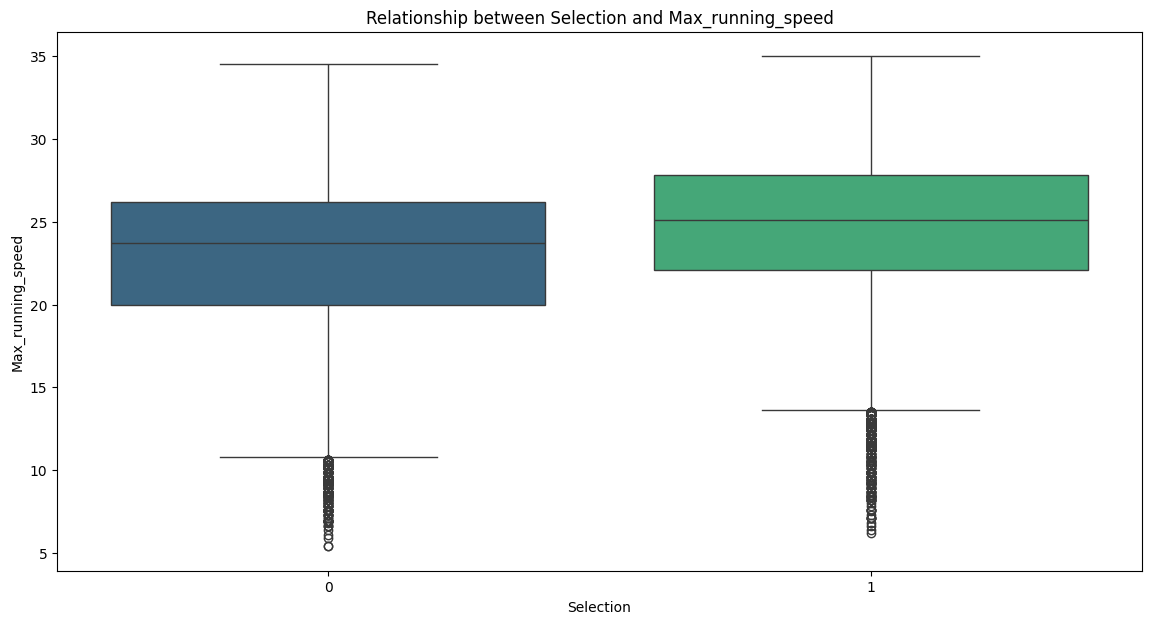

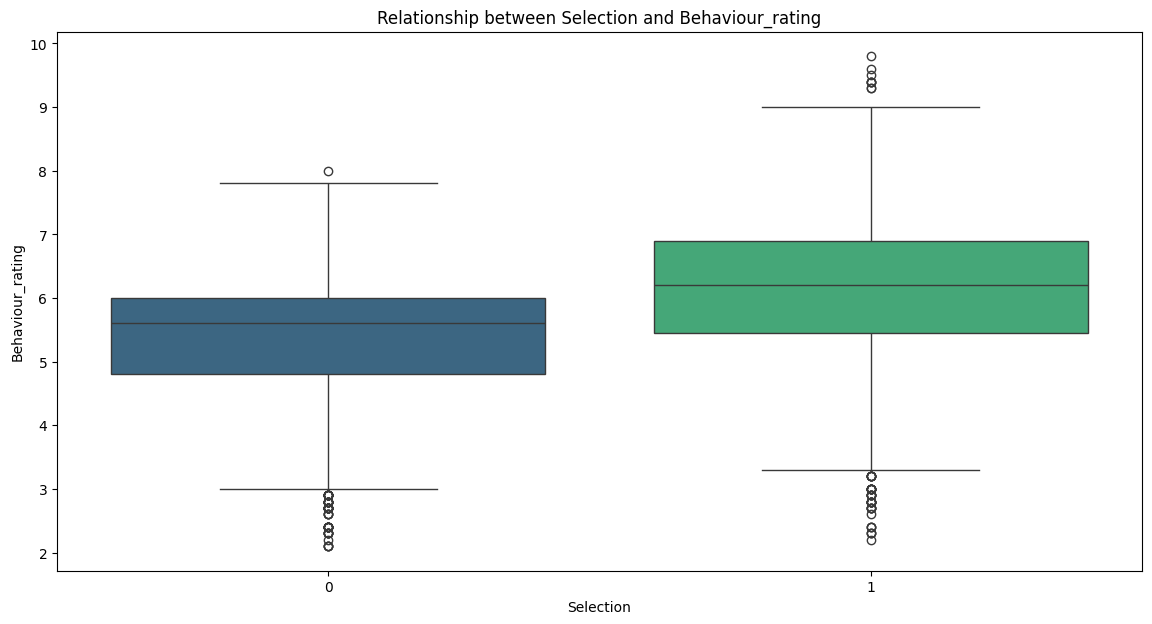

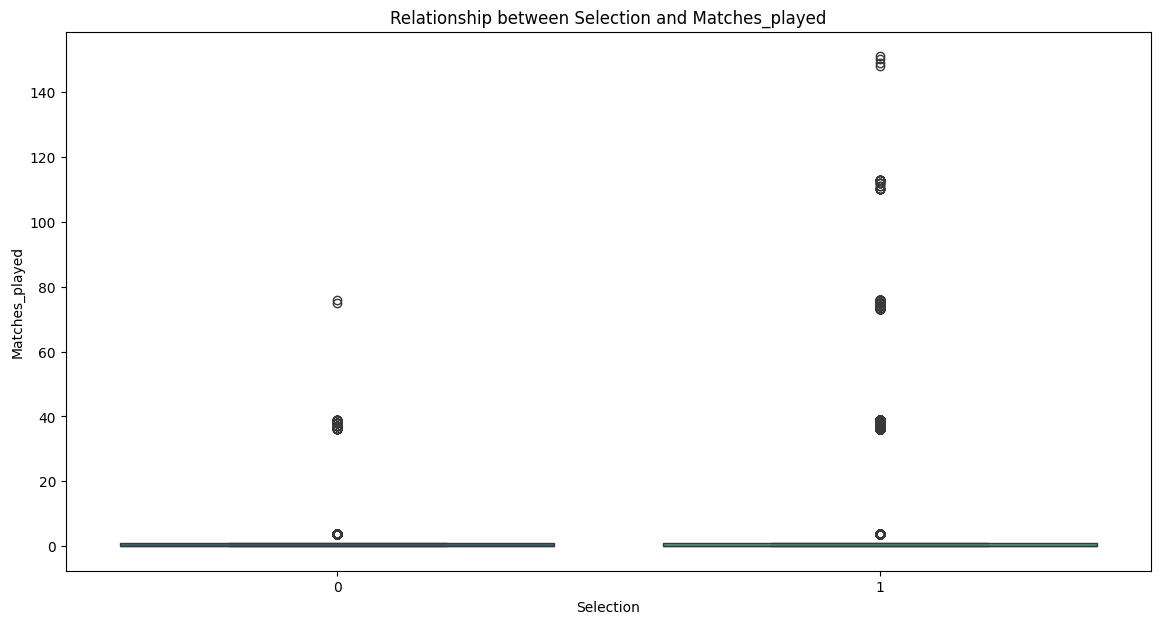

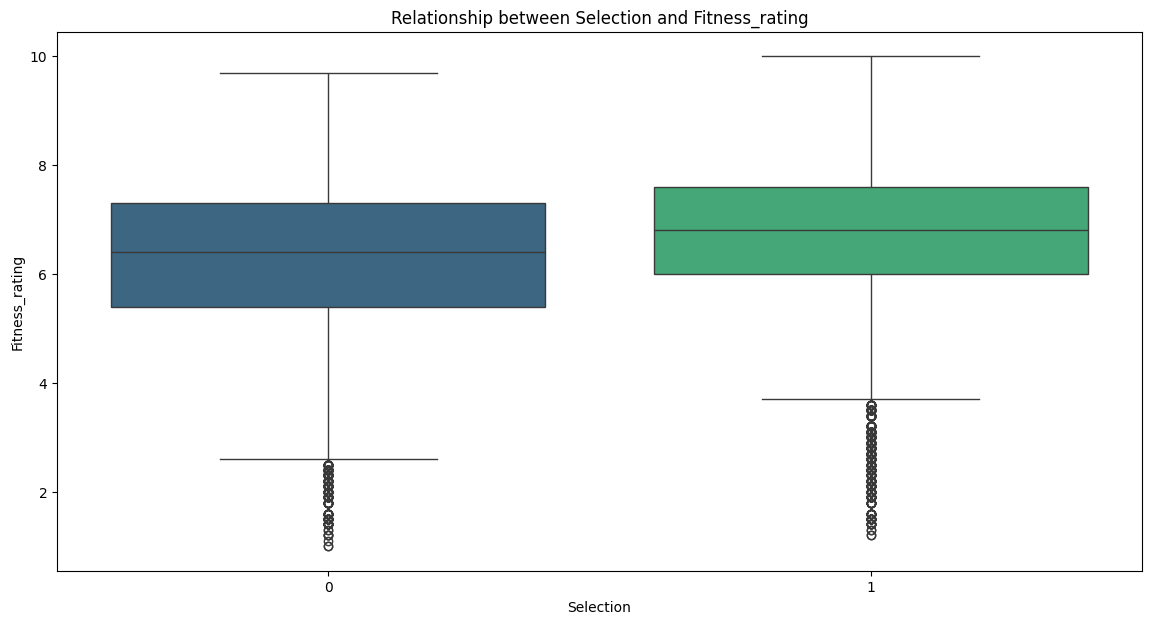

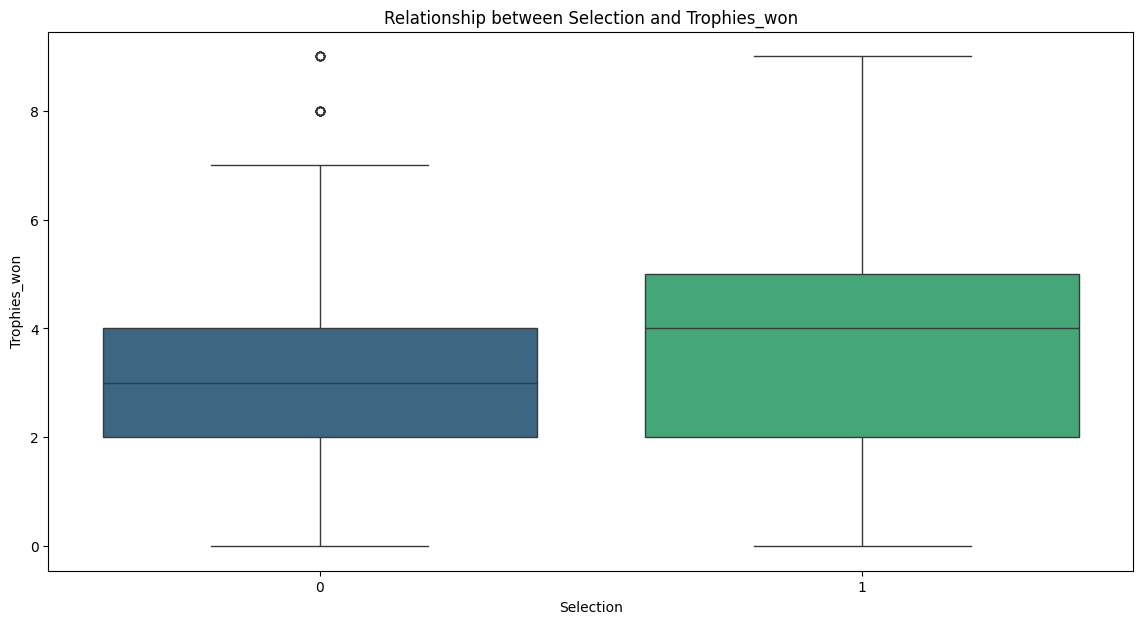

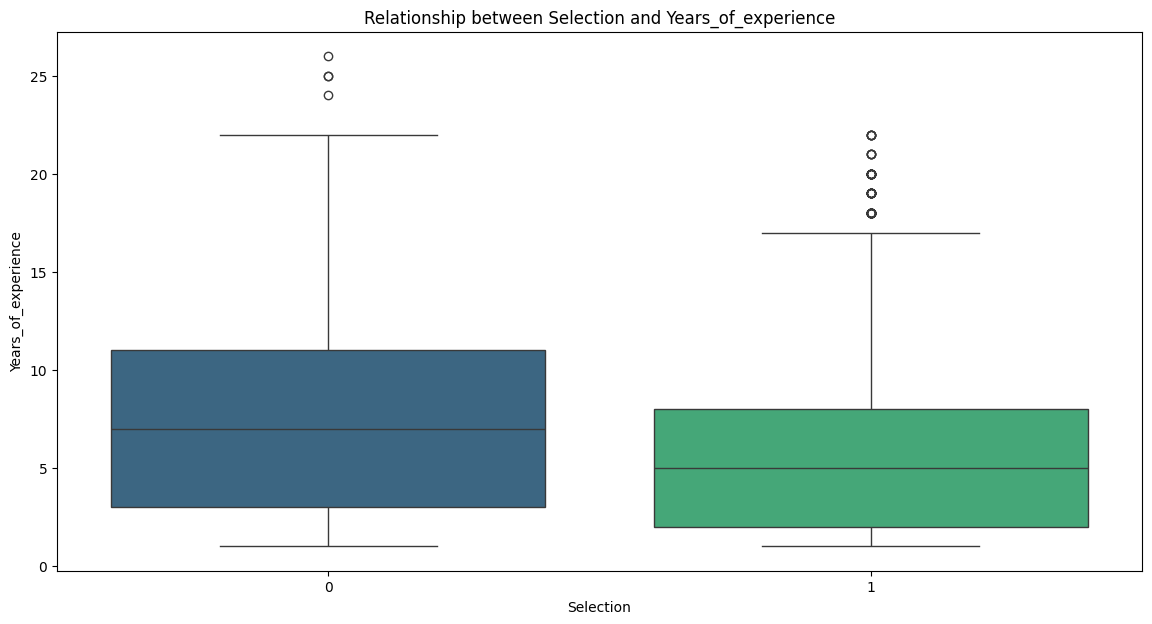

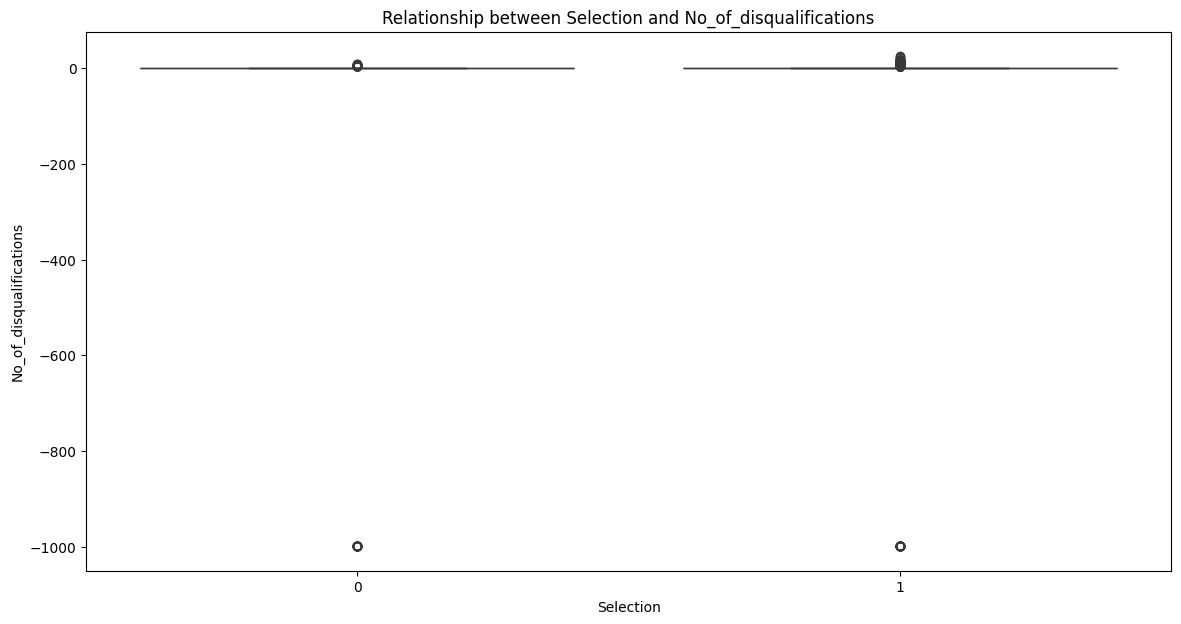

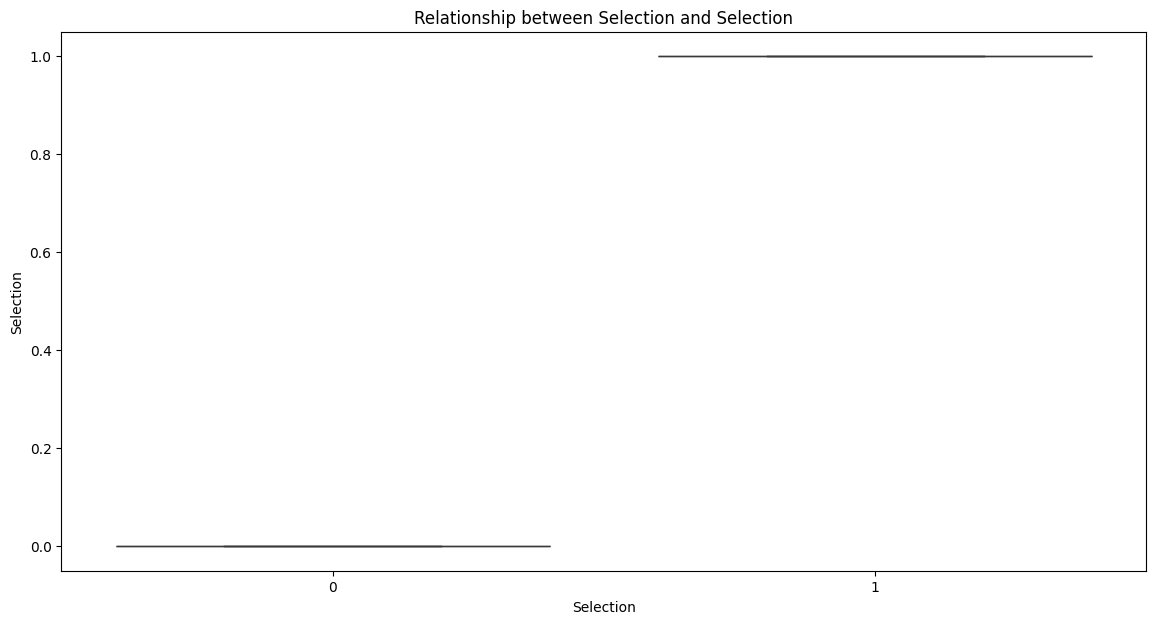

In [191]:
# List of categorical columns
categorical_cols = ['gender', 'country', 'height_cm' 'weight_kg',
       'strong_foot', 'dedication_level', 'coaching']

# List of numerical columns
numerical_cols = ['age', 'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'behaviour_rating', 'matches_played',
       'fitness_rating', 'trophies_won', 'years_of_experience',
       'no_of_disqualifications', 'selection']

# Bivariate analysis for categorical columns with selection
for col in categorical_cols:
    if col in data.columns:
        plt.figure(figsize=(14, 7))
        sns.countplot(x=col, hue='selection', data=data, palette='viridis')
        plt.title(f'Selection Status by {col.capitalize()}')
        plt.xlabel(col.capitalize())
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Column '{col}' not found in the dataset.")

# Bivariate analysis for numerical columns with selection
for col in numerical_cols:
    if col in data.columns:
        plt.figure(figsize=(14, 7))
        sns.boxplot(x='selection', y=col, data=data, palette='viridis')
        plt.title(f'Relationship between Selection and {col.capitalize()}')
        plt.xlabel('Selection')
        plt.ylabel(col.capitalize())
        plt.show()
    else:
        print(f"Column '{col}' not found in the dataset.")

# Pre-processing

Outliers removal from numerical cols

In [192]:
outliers = {}

for col in numerical_cols:
    if col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q2 = data[col].quantile(0.50)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        outlier_values = data[(data[col] < lower_limit) | (data[col] > upper_limit)][col]
        outliers[col] = {
            'Q1': Q1,
            'Q2': Q2,
            'Q3': Q3,
            'Outliers': outlier_values.tolist()
        }

# Print the quartiles and outliers for each column
for col, q in outliers.items():
    print(f"{col}: Q1={q['Q1']}, Q2={q['Q2']}, Q3={q['Q3']}, Outliers={q['Outliers']}")

age: Q1=17.0, Q2=20.0, Q3=24.0, Outliers=[51, 36, 36, 52, 57, 54, 57, 57, 57, 35, 54, 50, 36, 36, 57, 39, 49, 36, 55, 57, 53, 35, 57, 35, 55, 57, 57, 36, 54, 48, 35, 36, 36, 59, 53, 60, 55, 48, 36, 57, 35, 36, 37, 57, 57, 59, 36, 35, 35, 54, 57, 57, 36, 57, 57, 35, 57, 57, 58, 51, 57, 57, 35, 61, 55, 60, 39, 51, 57, 51, 57, 57, 57, 38, 55, 56, 57, 57, 60, 57, 57, 51, 50, 56, 57, 36, 58, 50, 57, 57, 35, 57, 57, 57, 57, 61, 53, 57, 35, 35, 57, 57, 36, 57, 58, 35, 57, 57, 57, 57, 35, 35, 55, 56, 40, 57, 35, 56, 51]
ball_controlling_skills: Q1=52.0, Q2=60.0, Q3=67.0, Outliers=[16.0, 29.0, 17.0, 19.0, 20.0, 18.0, 25.0, 17.0, 9.0, 17.0, 22.0, 10.0, 24.0, 29.0, 17.0, 20.0, 21.0, 15.0, 21.0, 13.0, 20.0, 29.0, 18.0, 25.0, 13.0, 16.0, 11.0, 10.0, 13.0, 10.0, 10.0, 20.0, 25.0, 22.0, 23.0, 10.0, 19.0, 11.0, 18.0, 12.0, 10.0, 9.0, 12.0, 11.0, 13.0, 8.0, 17.0, 29.0, 14.0, 21.0, 20.0, 8.0, 15.0, 29.0, 18.0, 20.0, 21.0, 15.0, 27.0, 22.0, 22.0, 19.0, 14.0, 25.0, 16.0, 10.0, 20.0, 14.0, 11.0, 15.0, 17.0

Using clipping to remove

In [193]:
for col in numerical_cols:
    if col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q2 = data[col].quantile(0.50)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        outlier_values = data[(data[col] < lower_limit) | (data[col] > upper_limit)][col]
        outliers[col] = {
            'Q1': Q1,
            'Q2': Q2,
            'Q3': Q3,
            'Outliers': outlier_values.tolist()
        }
        data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)

# Print the quartiles and outliers for each column
for col, q in outliers.items():
    print(f"{col}: Q1={q['Q1']}, Q2={q['Q2']}, Q3={q['Q3']}, Outliers={q['Outliers']}")

age: Q1=17.0, Q2=20.0, Q3=24.0, Outliers=[51, 36, 36, 52, 57, 54, 57, 57, 57, 35, 54, 50, 36, 36, 57, 39, 49, 36, 55, 57, 53, 35, 57, 35, 55, 57, 57, 36, 54, 48, 35, 36, 36, 59, 53, 60, 55, 48, 36, 57, 35, 36, 37, 57, 57, 59, 36, 35, 35, 54, 57, 57, 36, 57, 57, 35, 57, 57, 58, 51, 57, 57, 35, 61, 55, 60, 39, 51, 57, 51, 57, 57, 57, 38, 55, 56, 57, 57, 60, 57, 57, 51, 50, 56, 57, 36, 58, 50, 57, 57, 35, 57, 57, 57, 57, 61, 53, 57, 35, 35, 57, 57, 36, 57, 58, 35, 57, 57, 57, 57, 35, 35, 55, 56, 40, 57, 35, 56, 51]
ball_controlling_skills: Q1=52.0, Q2=60.0, Q3=67.0, Outliers=[16.0, 29.0, 17.0, 19.0, 20.0, 18.0, 25.0, 17.0, 9.0, 17.0, 22.0, 10.0, 24.0, 29.0, 17.0, 20.0, 21.0, 15.0, 21.0, 13.0, 20.0, 29.0, 18.0, 25.0, 13.0, 16.0, 11.0, 10.0, 13.0, 10.0, 10.0, 20.0, 25.0, 22.0, 23.0, 10.0, 19.0, 11.0, 18.0, 12.0, 10.0, 9.0, 12.0, 11.0, 13.0, 8.0, 17.0, 29.0, 14.0, 21.0, 20.0, 8.0, 15.0, 29.0, 18.0, 20.0, 21.0, 15.0, 27.0, 22.0, 22.0, 19.0, 14.0, 25.0, 16.0, 10.0, 20.0, 14.0, 11.0, 15.0, 17.0

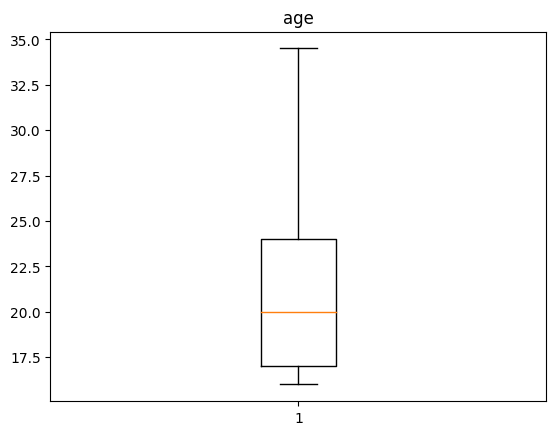

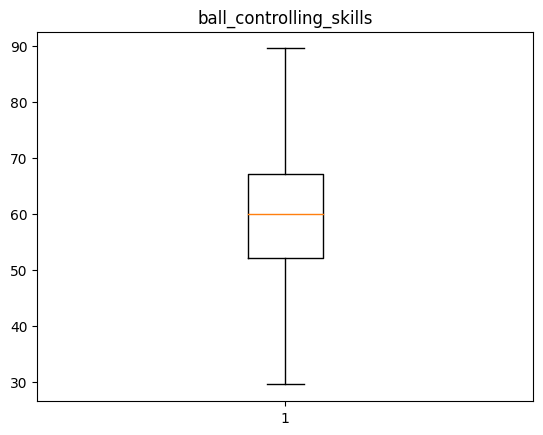

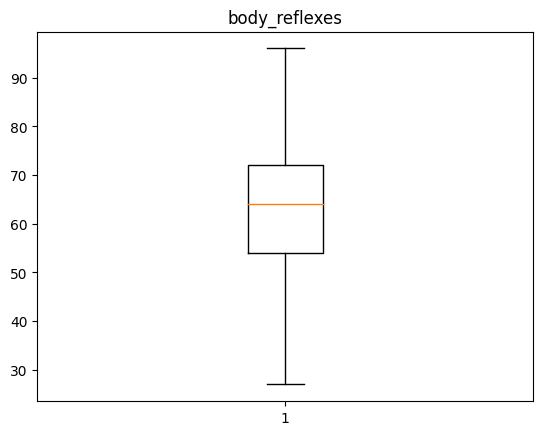

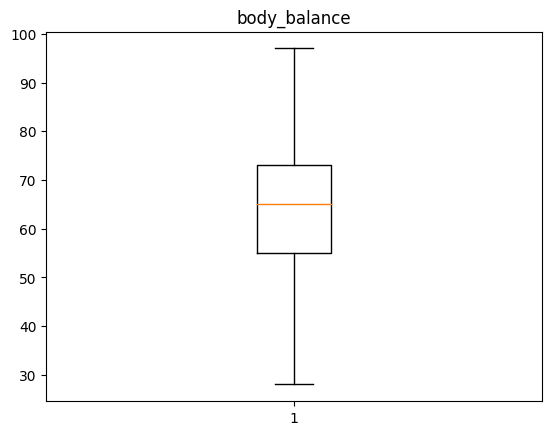

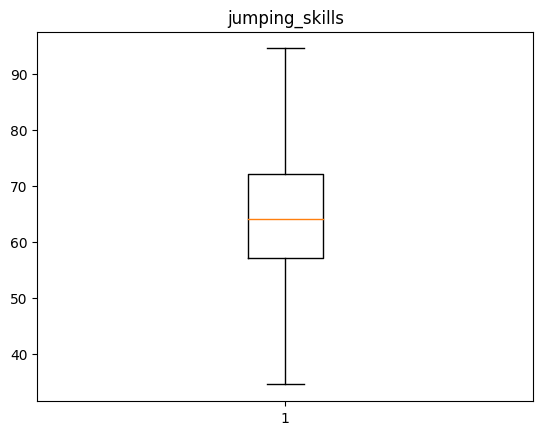

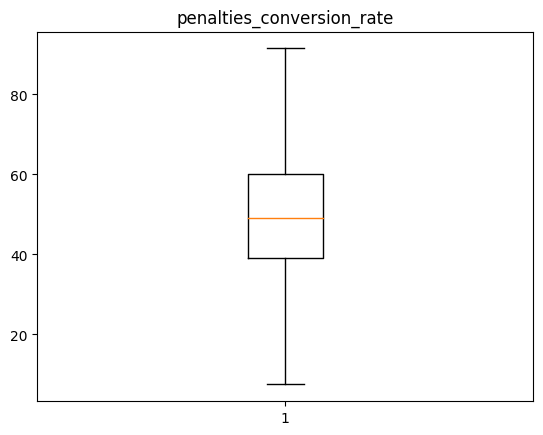

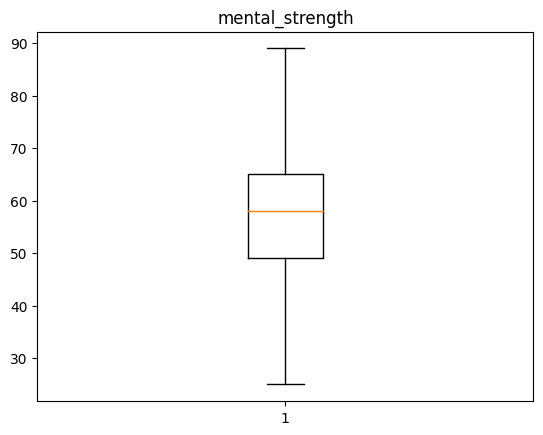

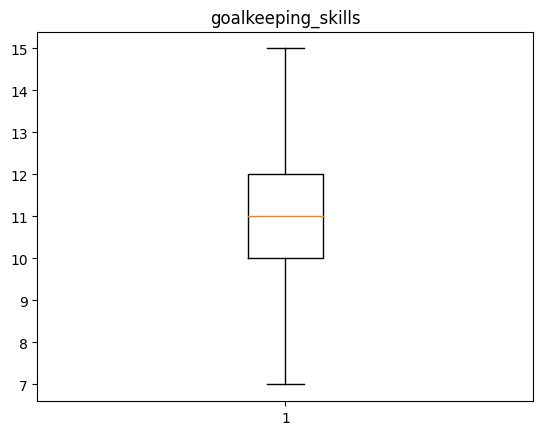

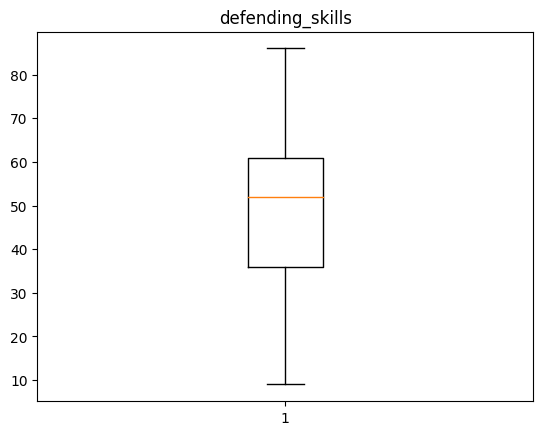

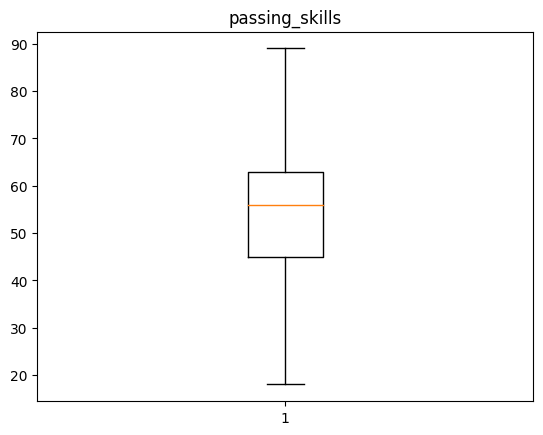

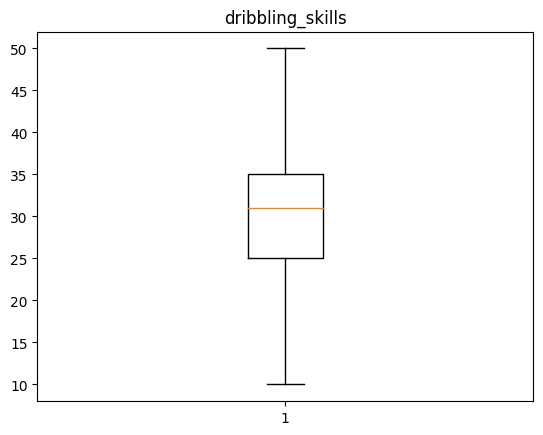

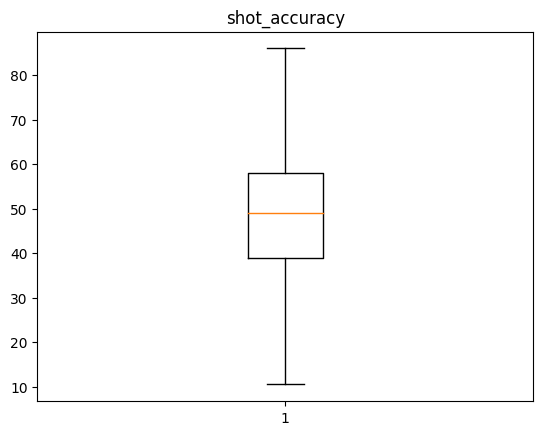

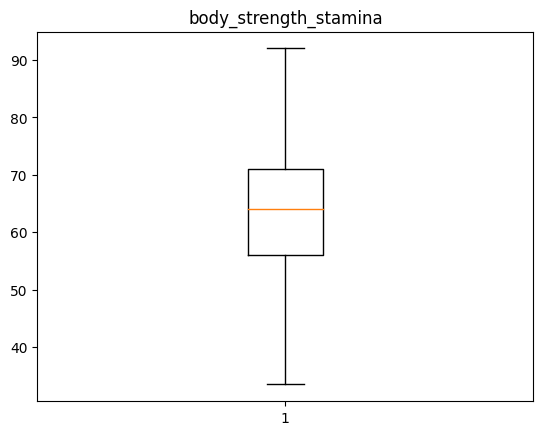

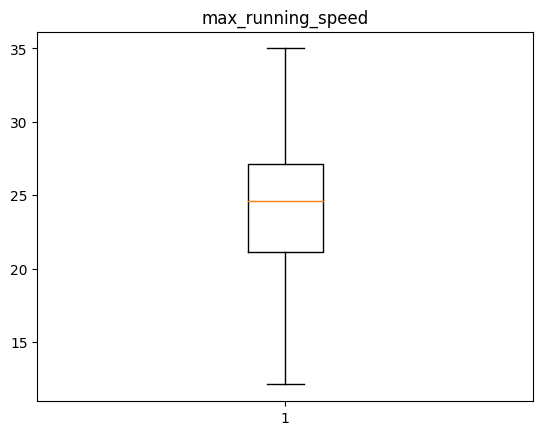

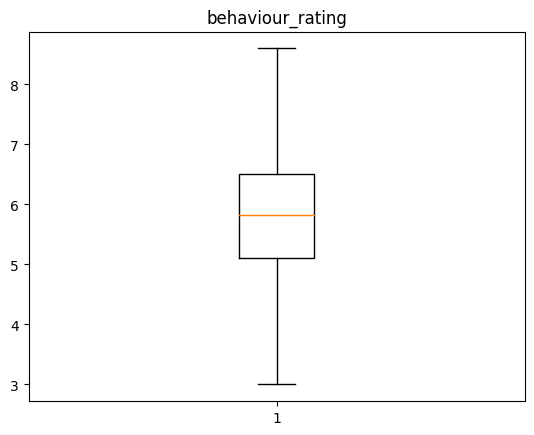

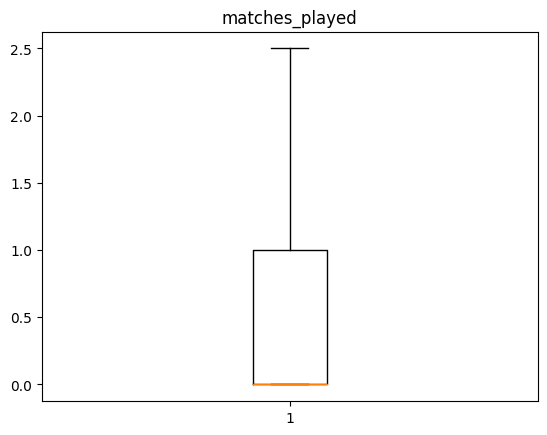

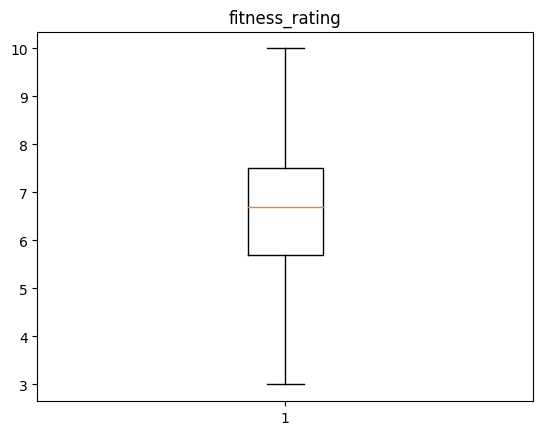

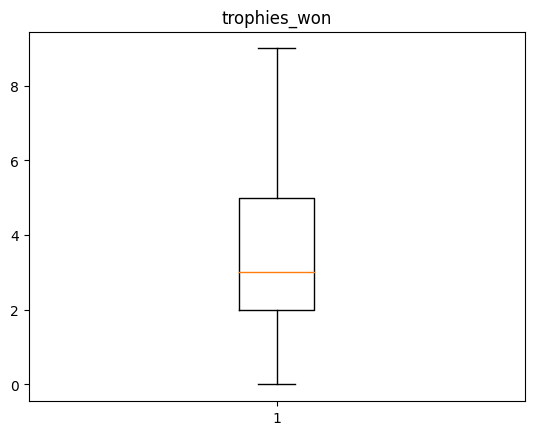

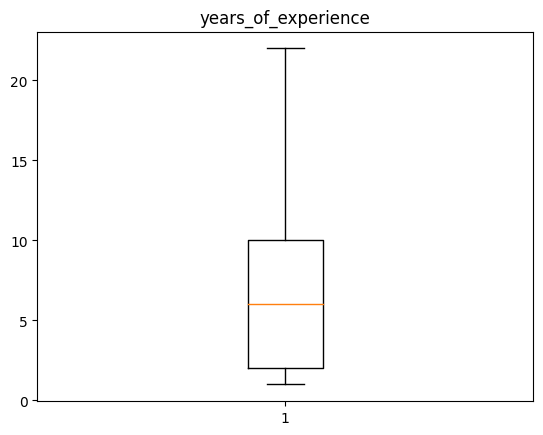

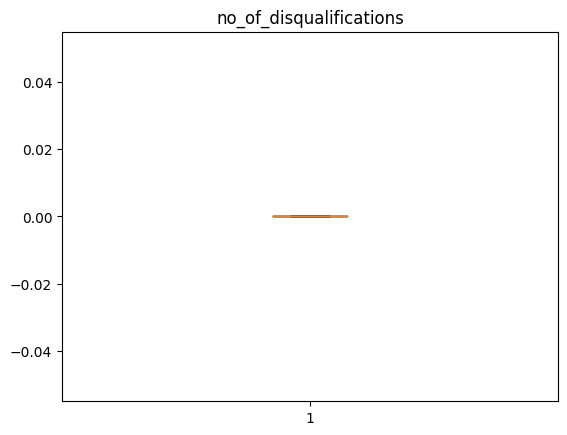

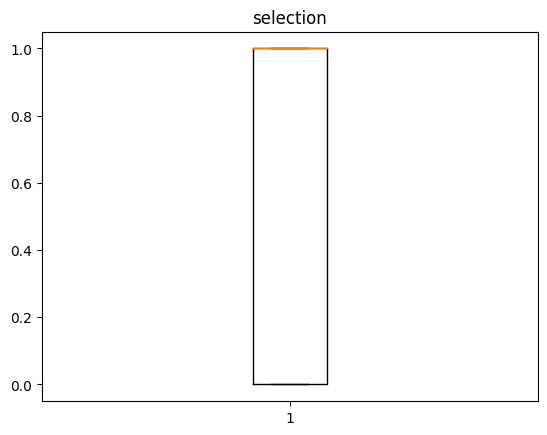

In [194]:
for i in numerical_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)


# Encoding

In [195]:
# encoding for categorical cols

num_obj_col=['gender', 'country','height_cm','weight_kg', 'strong_foot', 'dedication_level', 'coaching']
from sklearn.preprocessing import LabelEncoder

In [196]:
ln=LabelEncoder()
for i in num_obj_col:
  data[i]=ln.fit_transform(data[i])

In [197]:
data.head()

,age,gender,country,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,...,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection,height_cm,weight_kg
0,23.0,1,153,77.0,58.0,47.0,59.0,41.0,73.0,13.0,...,2.5,8.100000,2.0,0,2,8.0,0.0,1,14,47
1,18.0,1,124,54.0,69.0,70.0,62.0,53.0,43.0,10.0,...,0.0,6.405482,3.0,2,1,3.0,0.0,0,10,24
2,16.0,0,135,34.0,43.0,45.0,69.0,49.0,45.0,10.0,...,0.0,6.600000,5.0,1,0,2.0,0.0,1,14,44
3,27.0,1,28,79.0,73.0,76.0,86.0,81.0,80.0,7.0,...,2.5,8.600000,6.0,2,0,13.0,0.0,1,11,38
4,19.0,0,5,47.0,61.0,74.0,57.0,49.0,35.0,9.0,...,0.0,5.700000,5.0,2,0,4.0,0.0,0,8,32


In [198]:
y=data['selection'] # target variable
x=data.drop(['selection'],axis=1)

In [199]:
y = np.array(y)
y=y.reshape(-1,1)

In [200]:
corr_matrix = data.corr()

In [201]:
data['selection']=data['selection'].apply(lambda x:1 if x=='selected' else 0)

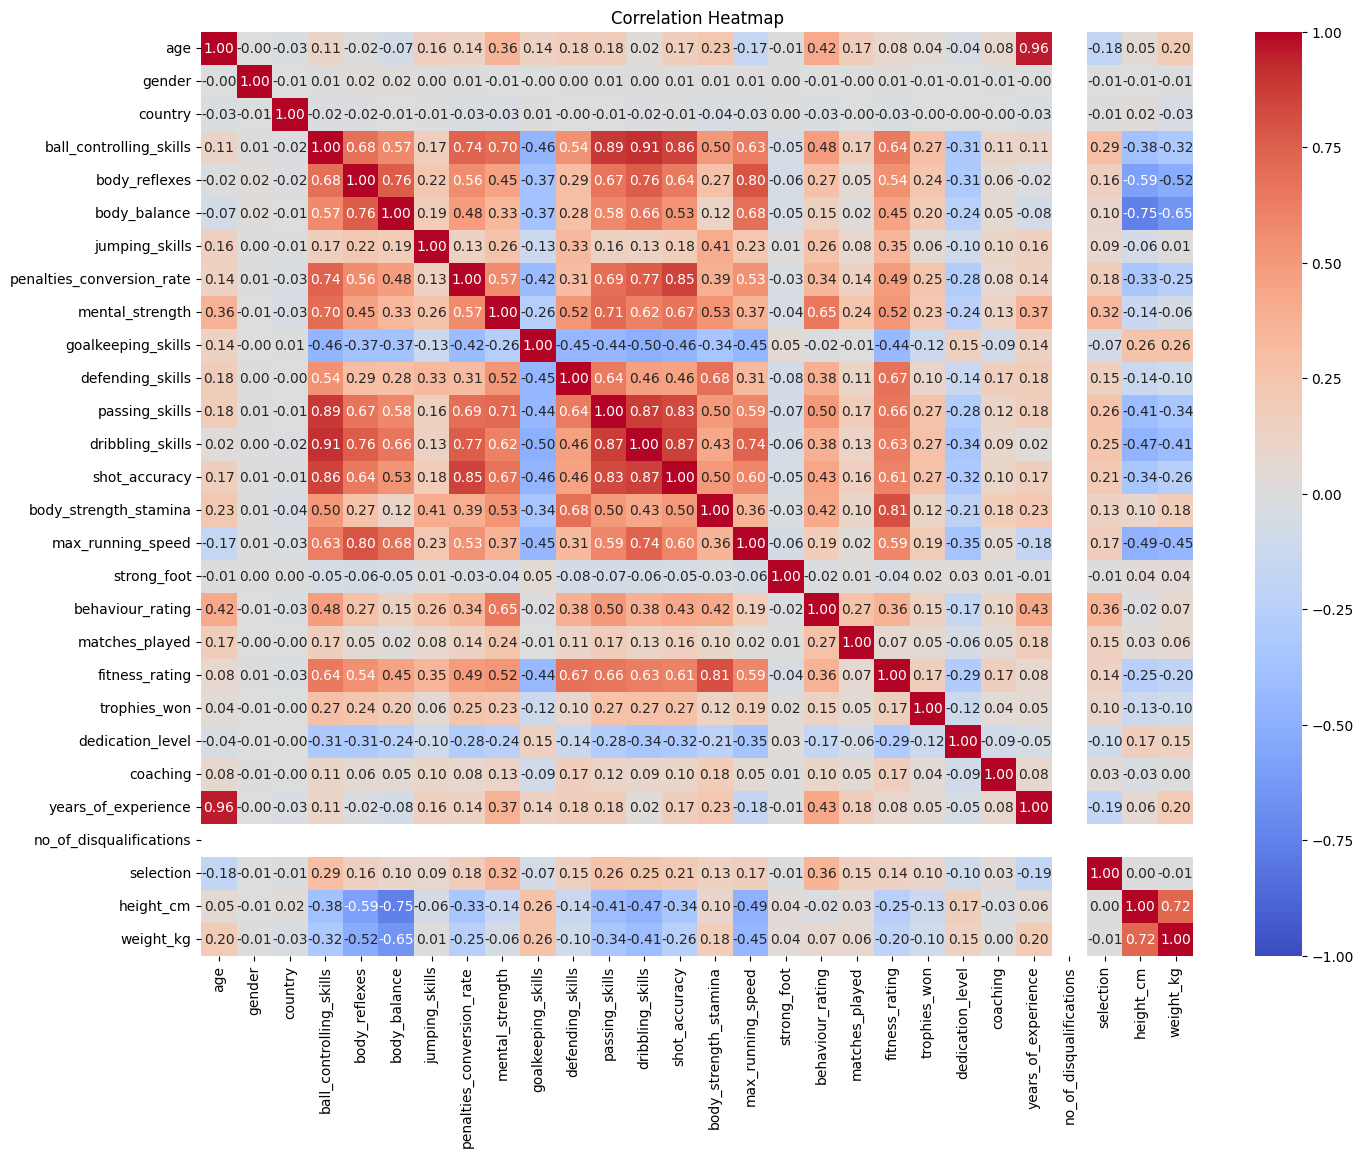

In [202]:
# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


# Scaling

In [203]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [204]:
sc_data=sc.fit_transform(data)

In [205]:
datascaled_new=pd.DataFrame(sc_data)
datascaled_new

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.442220,0.998001,1.665033,1.446488,-0.270885,-1.130686,-0.399194,-0.475922,1.370035,0.974847,...,2.339473,1.057834,-0.812768,-1.656762,1.284535,0.354097,0.0,0.0,1.003254,0.680847
1,-0.665923,0.998001,1.045893,-0.245622,0.474155,0.512256,-0.143536,0.285990,-1.170141,-0.529344,...,-0.626677,-0.026747,-0.227662,0.645480,0.328173,-0.775971,0.0,0.0,-0.460799,-1.174014
2,-1.109181,-1.002003,1.280739,-1.717023,-1.286850,-1.273551,0.453000,0.032019,-1.000796,-0.529344,...,-0.626677,0.097755,0.942550,-0.505641,-0.628189,-1.001985,0.0,0.0,1.003254,0.438909
3,1.328735,0.998001,-1.003673,1.593628,0.745079,0.940850,1.901730,2.063786,1.962743,-2.033535,...,2.339473,1.377860,1.527657,0.645480,-0.628189,1.484165,0.0,0.0,-0.094786,-0.044968
4,-0.444295,-1.002003,-1.494715,-0.760612,-0.067692,0.797986,-0.569633,0.032019,-1.847521,-1.030741,...,-0.626677,-0.478293,0.942550,0.645480,-0.628189,-0.549958,0.0,0.0,-1.192826,-0.528845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,-0.222666,0.998001,1.729082,0.195798,-0.948195,-0.059202,-0.313974,-0.539415,0.353965,-0.529344,...,2.339473,0.737807,-0.812768,0.645480,-0.628189,-0.097930,0.0,0.0,0.271228,-0.286906
13990,-0.665923,-1.002003,-0.640729,-0.319192,0.406425,-0.273499,0.793878,-1.555299,-0.154070,-0.027947,...,-0.626677,-0.542298,-0.227662,0.645480,-0.628189,-0.549958,0.0,0.0,-0.460799,-0.044968
13991,-0.887552,0.998001,0.063809,-0.098482,0.745079,-0.059202,-1.166169,-0.094966,0.607983,-0.529344,...,-0.626677,0.801813,-0.227662,-0.505641,1.284535,-1.001985,0.0,0.0,0.271228,0.438909
13992,-0.222666,-1.002003,1.665033,1.005068,0.474155,0.512256,-1.080949,0.476468,0.184620,-1.030741,...,0.559783,-0.414287,0.357444,0.645480,-0.628189,-0.097930,0.0,0.0,-0.460799,-1.012721


# Model creation

In [206]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.4,stratify=y)

In [207]:
X_train.shape

(8396, 27)

In [208]:
X_test.shape

(5598, 27)

In [209]:
y_train.shape

(8396, 1)

In [210]:
y_test.shape

(5598, 1)

In [211]:
y.shape

(13994, 1)

In [215]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample

In [213]:
# Define models
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')

SVM Accuracy: 0.7783
Logistic Regression Accuracy: 0.7529
Random Forest Accuracy: 0.8428
Decision Tree Accuracy: 0.7621


Parameter tuning

In [ ]:
# Hyperparameter tuning
param_grids = {
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 10, 20]}
}

best_models = {}

for model_name, param_grid in param_grids.items():
    grid_search = GridSearchCV(models[model_name], param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    best_accuracy = grid_search.best_score_
    print(f'Best {model_name} Model: {grid_search.best_params_}, Accuracy: {best_accuracy:.4f}')

# Evaluate the best models on the test set
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Best {model_name} Test Accuracy: {accuracy:.4f}')